# Beginning

We will cover the following topics in seaborn library:
> - Kernel Density Estimate (KDE) plot.
> - Histogram.
> - [Box plot](#Box-plot).
> - [Scatter plot](#Scatter-plot).
> - [Line plot](#Line-plot).
> - [Heatmap](#Heatmap).
> - [Bar plot](#Bar-plot).
> - [Count plot](#Count-plot).
> - [Color palettes and customizations](#Color-palette).

First of all, we will import the libraries we will need in the whole notebook:

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

We import the data we will need for the first topic from seaborn library.

In [2]:
data = sns.load_dataset("mpg").dropna()
data.shape

(392, 9)

In [3]:
data.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

# Univariate(1D) KDE plot

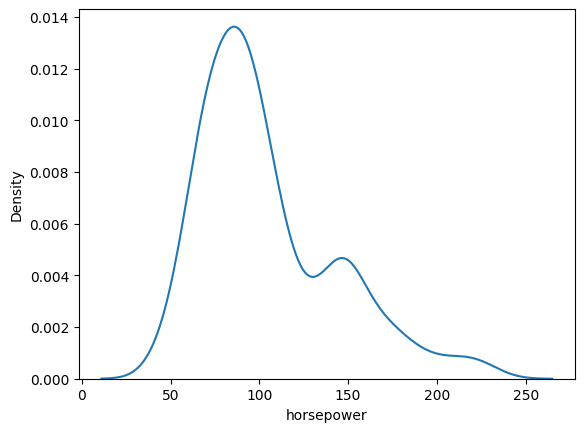

In [4]:
sns.kdeplot(data.horsepower)
plt.show()

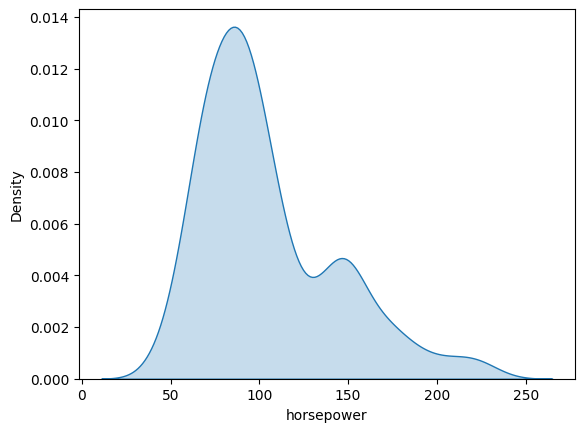

In [5]:
sns.kdeplot(data.horsepower, shade=True)
plt.show()

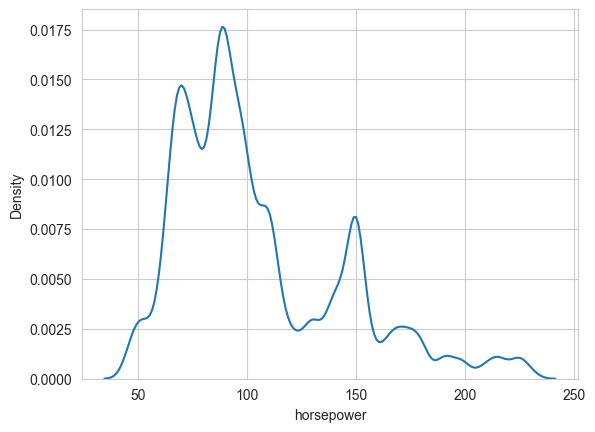

In [6]:
sns.set_style("whitegrid")
sns.kdeplot(data.horsepower, bw=0.1);

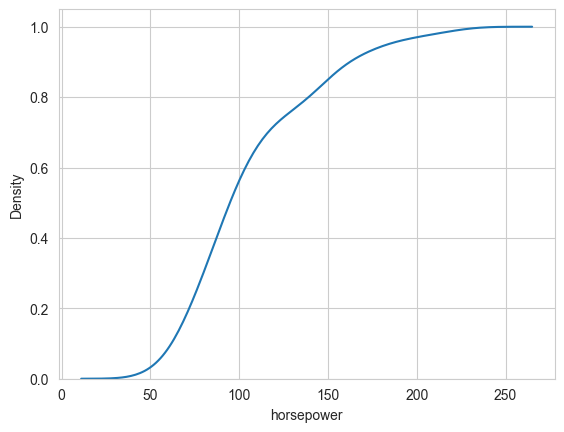

In [7]:
sns.kdeplot(data.horsepower, cumulative=True);

# Bi-variate(2D) KDE plot

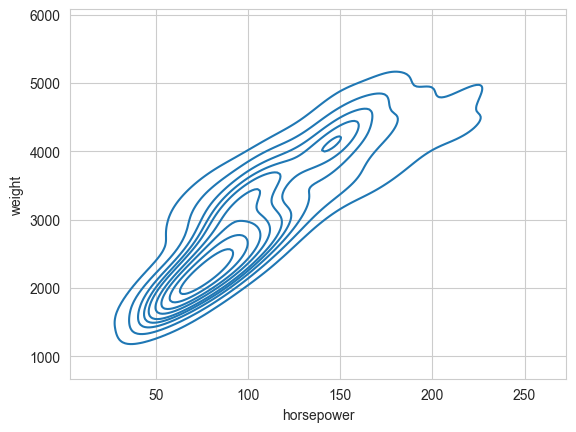

In [8]:
sns.kdeplot(x = 'horsepower', y='weight', data = data);

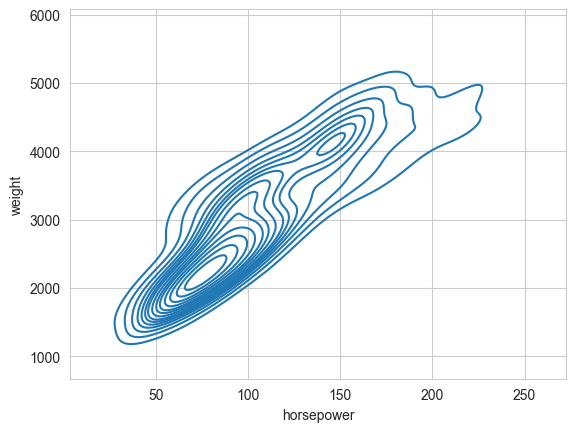

In [9]:
sns.kdeplot(x = 'horsepower', y='weight', data = data, n_levels=15);

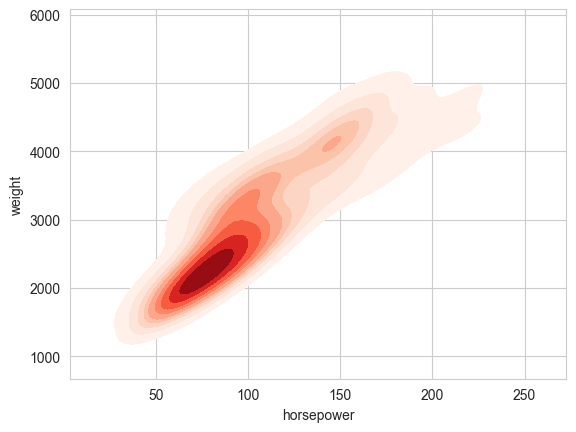

In [10]:
sns.kdeplot(x = 'horsepower', y='weight', data = data, cmap="Reds", shade=True, shade_lowest=False);

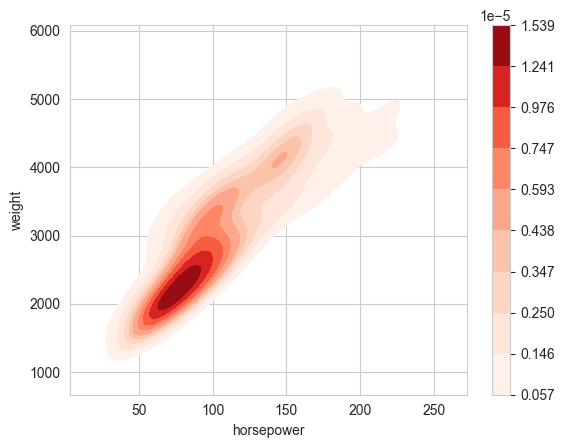

In [11]:
sns.kdeplot(x = 'horsepower', y='weight', data = data, cmap="Reds", shade=True, shade_lowest=False, cbar=True);

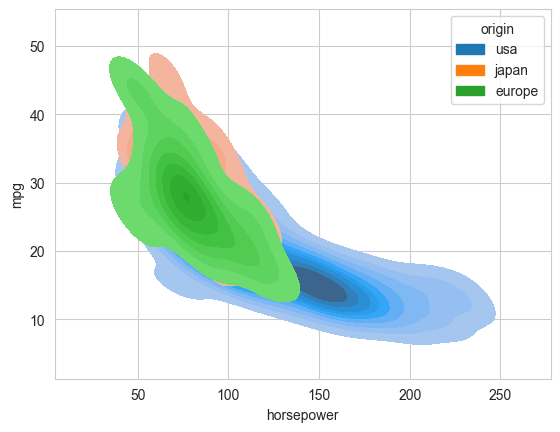

In [12]:
sns.kdeplot(x = 'horsepower', y='mpg', data = data, 
            shade=True, hue=data.origin);

# Univariate(1D) histogram

We will use the same dataset for the next topic.

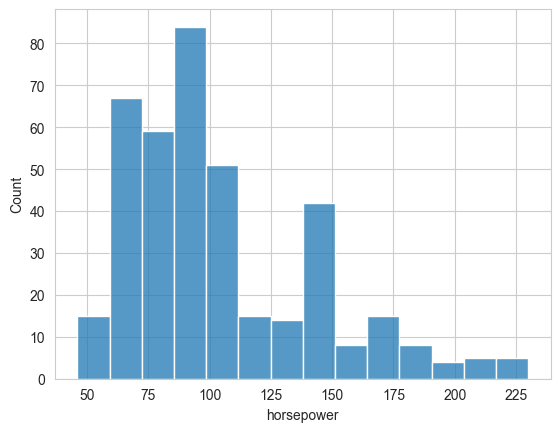

In [13]:
sns.histplot(data.horsepower); # or sns.histplot(x = 'horsepower', data = data);

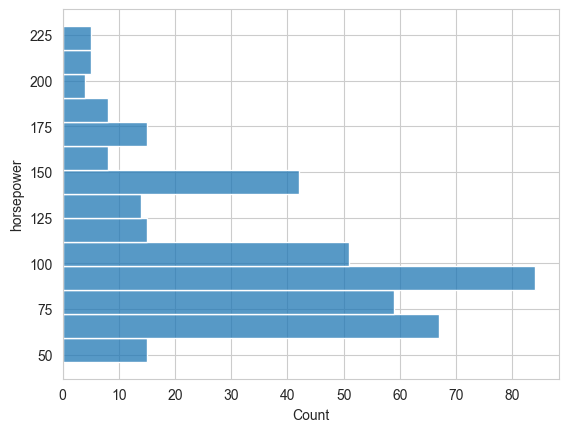

In [14]:
sns.histplot(y = 'horsepower', data = data);

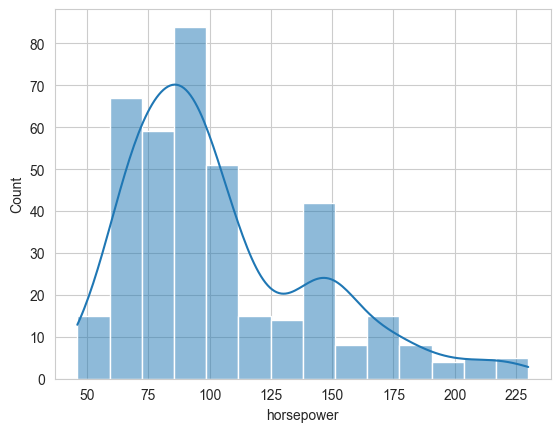

In [15]:
sns.histplot(data.horsepower, kde=True);

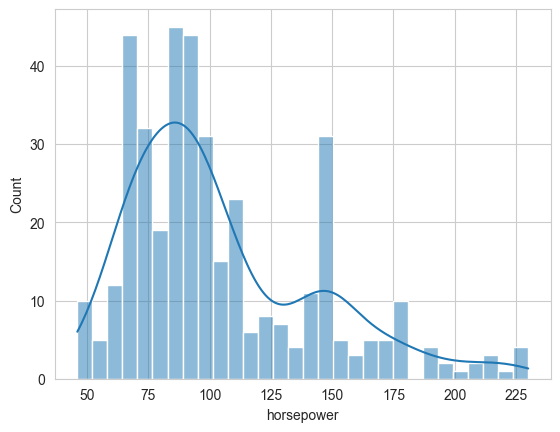

In [16]:
sns.histplot(data.horsepower, bins = 30, kde=True);

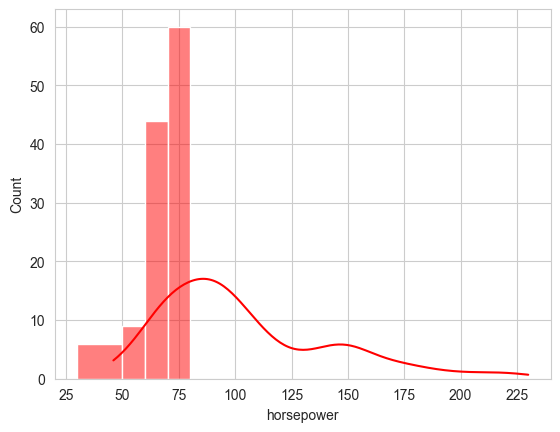

In [17]:
sns.histplot(data.horsepower, bins = [30, 50, 60, 70, 80], kde=True, color = 'red');

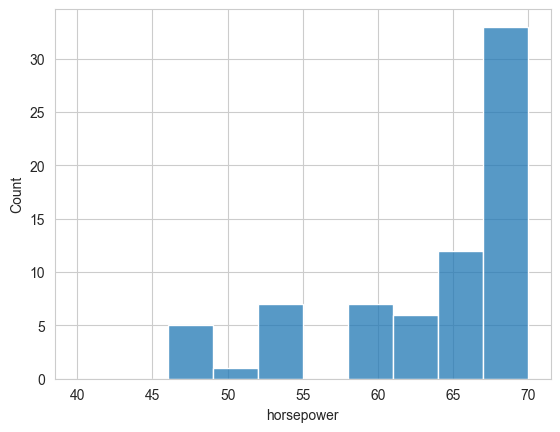

In [18]:
sns.histplot(data.horsepower, binwidth=3, binrange=(40, 70));

## Statistics of the data

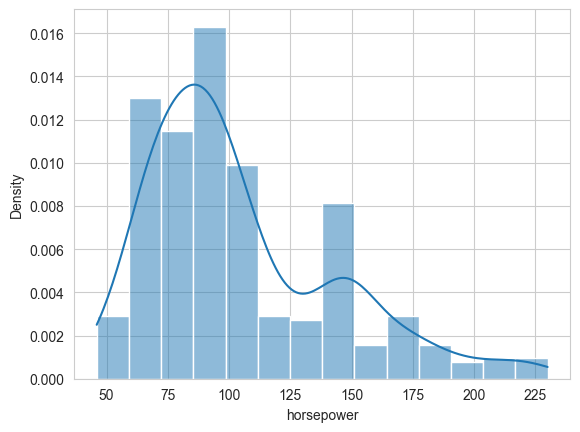

In [19]:
sns.histplot(data.horsepower, stat="density", kde=True); #area under the curve equals 1 or 100%

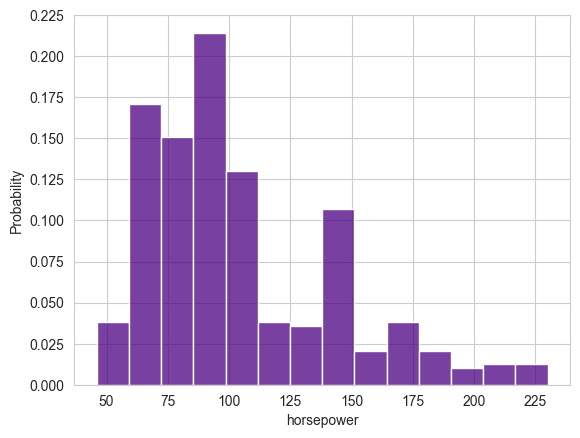

In [20]:
sns.histplot(data.horsepower, stat="probability", color="indigo");

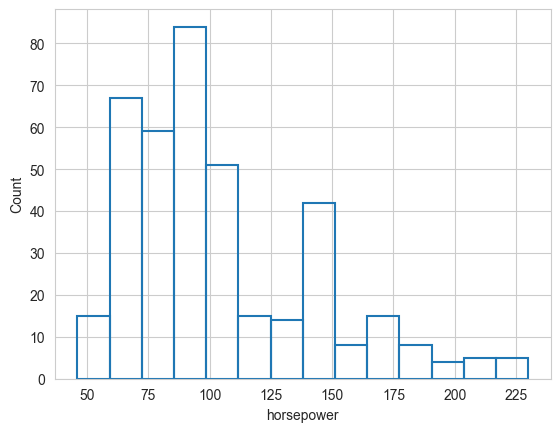

In [21]:
sns.histplot(data.horsepower, stat="count", fill=False);

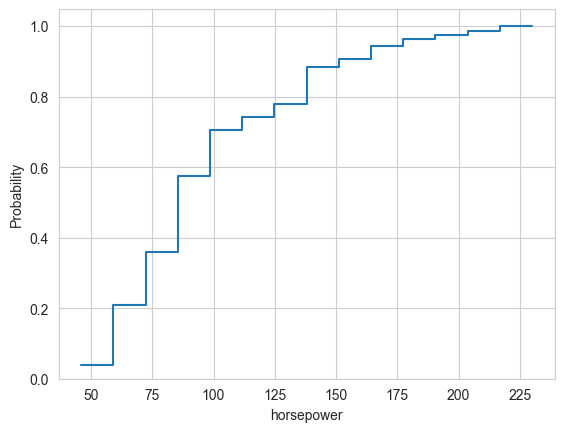

In [22]:
sns.histplot(data.horsepower, stat="probability", cumulative=True, fill=False, element="step");


## Categorical variables

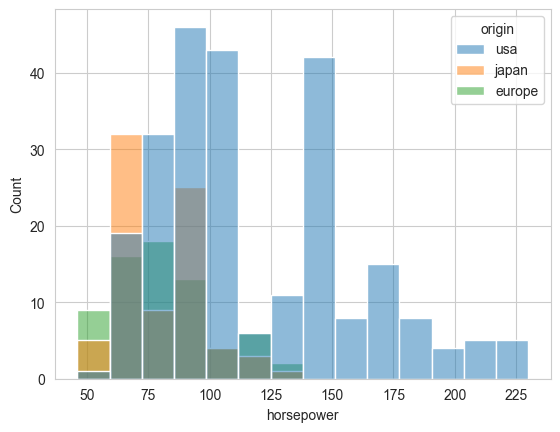

In [23]:
sns.histplot(x="horsepower", hue="origin", data = data, element="bars"); # default

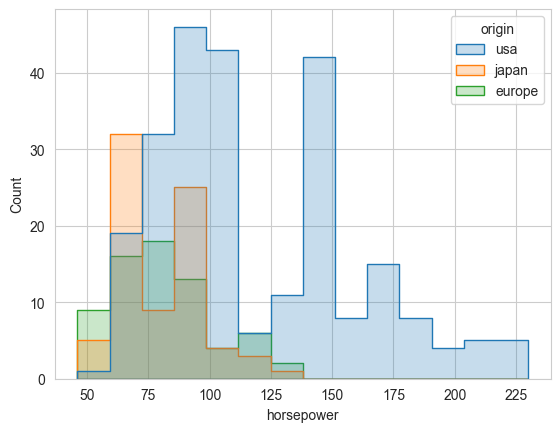

In [24]:
sns.histplot(x="horsepower", hue="origin", data = data, element="step");

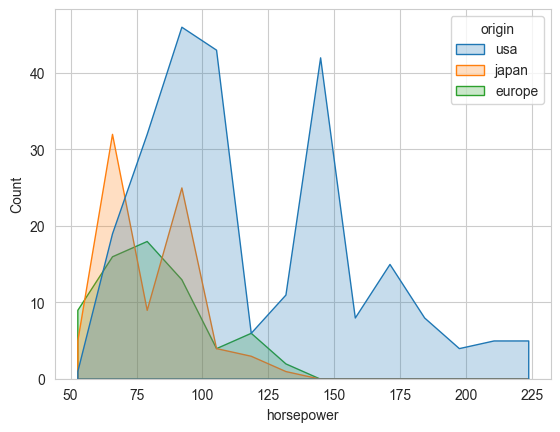

In [25]:
sns.histplot(x="horsepower", hue="origin", data = data, element="poly");

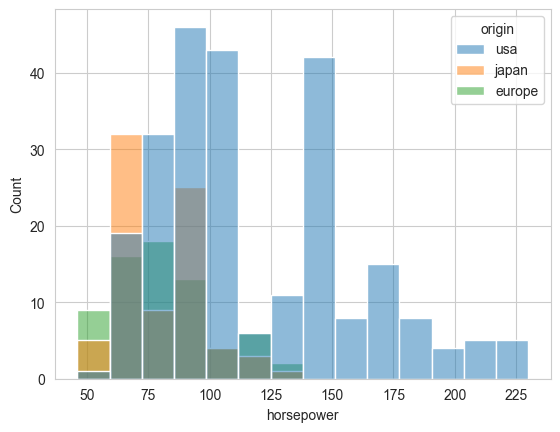

In [26]:
sns.histplot(x="horsepower", hue="origin", data = data, multiple="layer"); # default

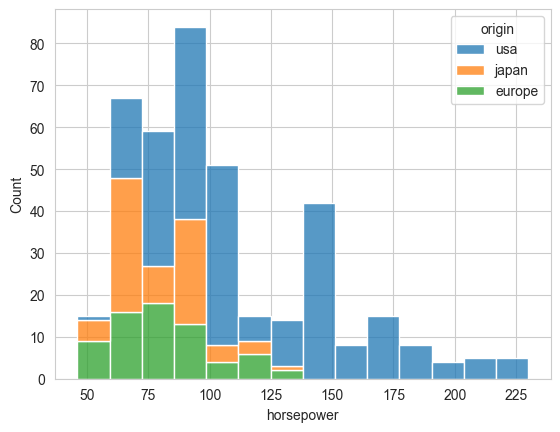

In [27]:
sns.histplot(x="horsepower", hue="origin", data = data, multiple="stack");

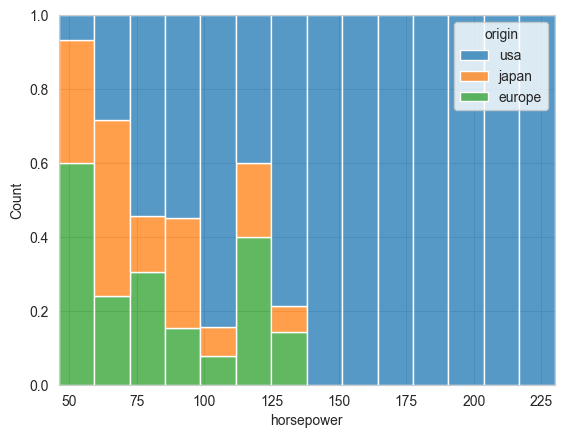

In [28]:
sns.histplot(x="horsepower", hue="origin", data = data, multiple="fill");

# Bi-variate(2D) histogram

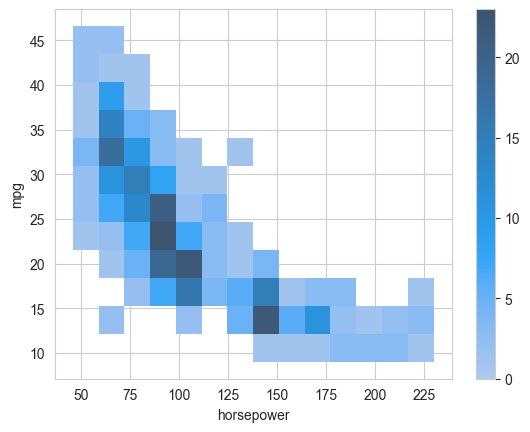

In [29]:
sns.histplot(x="horsepower", y="mpg", data = data, cbar=True);

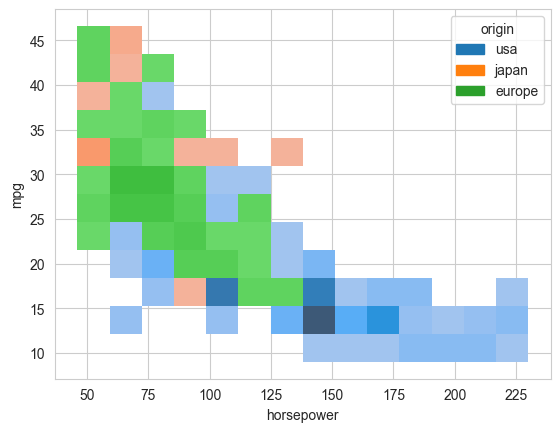

In [30]:
sns.histplot(x="horsepower", y="mpg", data = data, hue="origin");

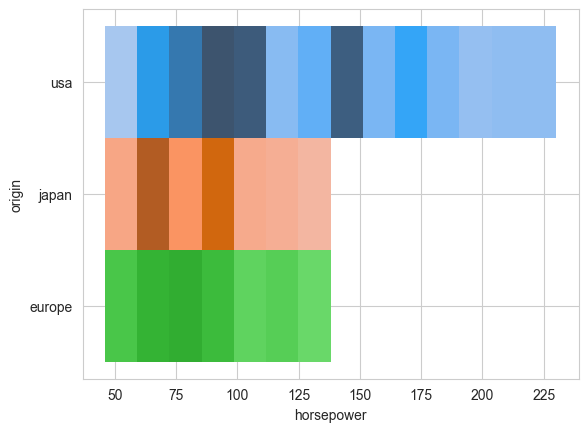

In [31]:
sns.histplot(x="horsepower", y="origin", data = data, hue="origin", legend=False);
# now it looks nice and clean

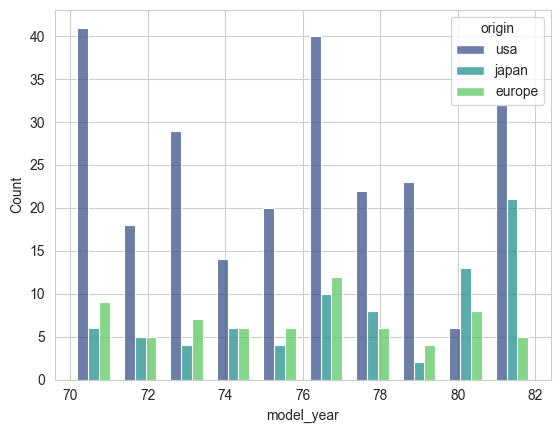

In [32]:
sns.histplot(x='model_year', hue='origin', data = data, multiple="dodge", shrink=0.7, palette="viridis");
# now we have space between the bars in each group

# Box plot

We will also use the same dataset for this topic.

In [33]:
data.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

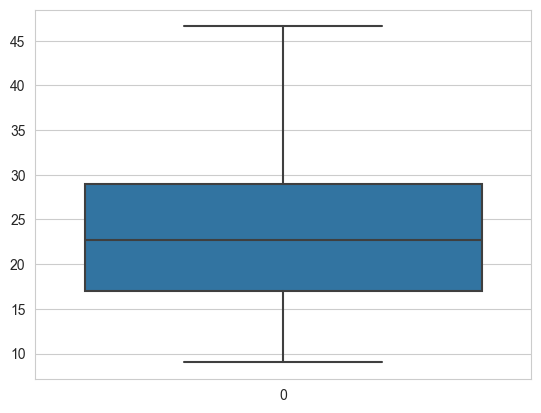

In [34]:
sns.boxplot(data.mpg);

In [35]:
data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

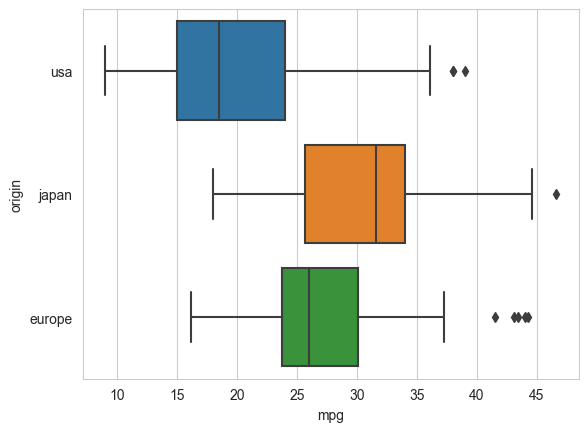

In [36]:
sns.boxplot(x=data.mpg, y=data.origin);

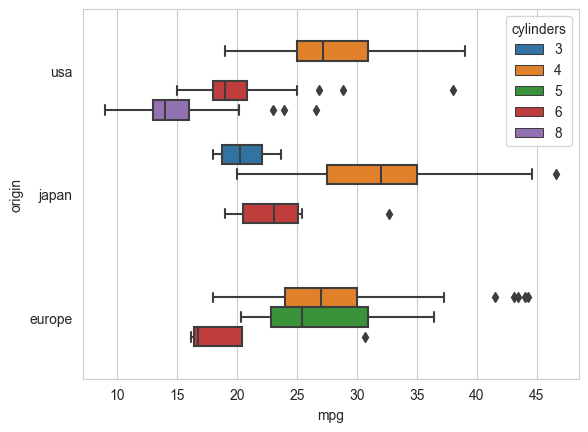

In [37]:
sns.boxplot(x=data.mpg, y=data.origin, hue=data.cylinders);

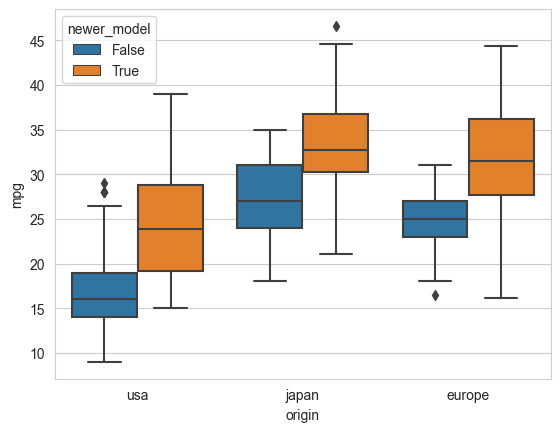

In [38]:
data['newer_model'] = data.model_year > 76
sns.boxplot(y=data.mpg, x=data.origin, hue=data.newer_model);

## Styling boxplot

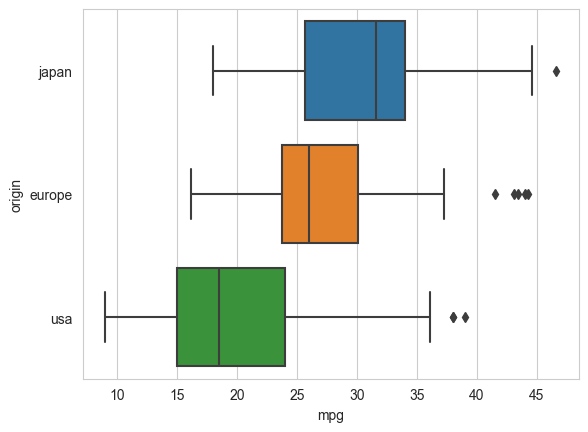

In [39]:
sns.boxplot(x=data.mpg, y=data.origin, order=["japan", "europe", "usa"]);

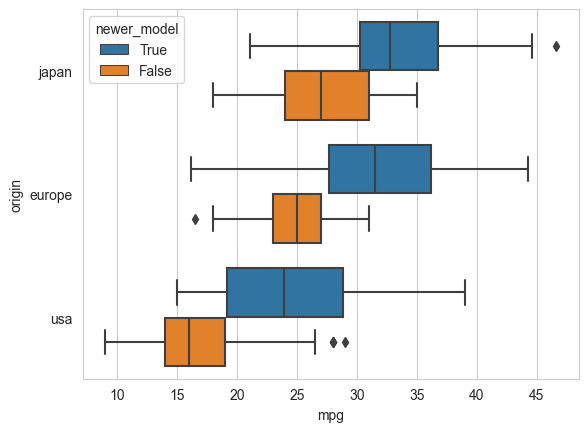

In [40]:
sns.boxplot(x=data.mpg, y=data.origin, hue=data.newer_model, order=["japan", "europe", "usa"], hue_order=[True, False]);

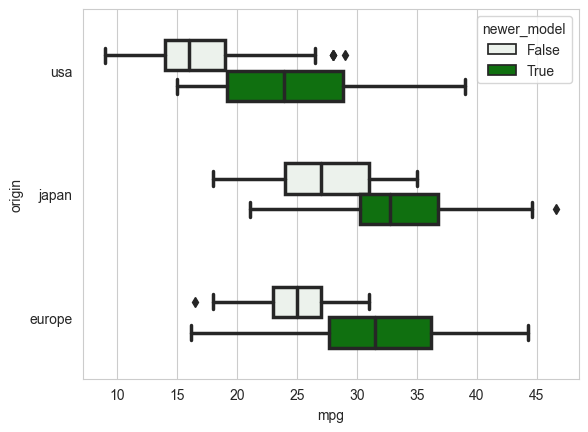

In [41]:
sns.boxplot(x=data.mpg, y=data.origin, hue=data.newer_model, color="green", width=0.5, linewidth=2.5);

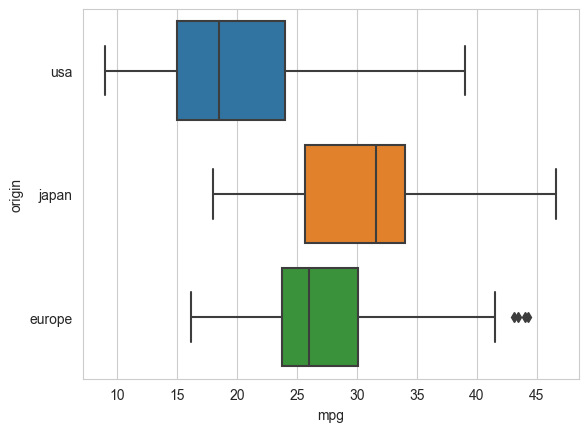

In [42]:
sns.boxplot(x=data.mpg, y=data.origin, whis=2); # the term whis is the length of the whiskers and it is 1.5 by default

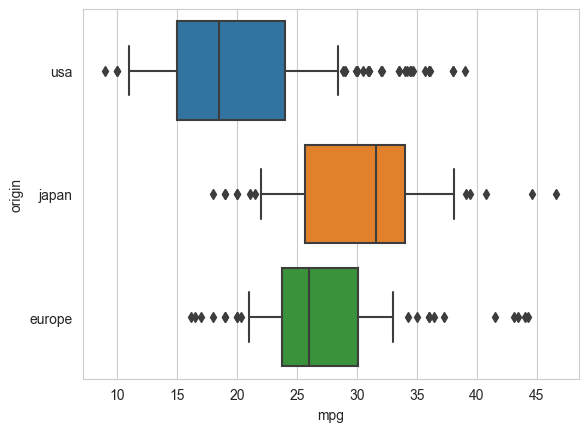

In [43]:
sns.boxplot(x=data.mpg, y=data.origin, whis=0.5);

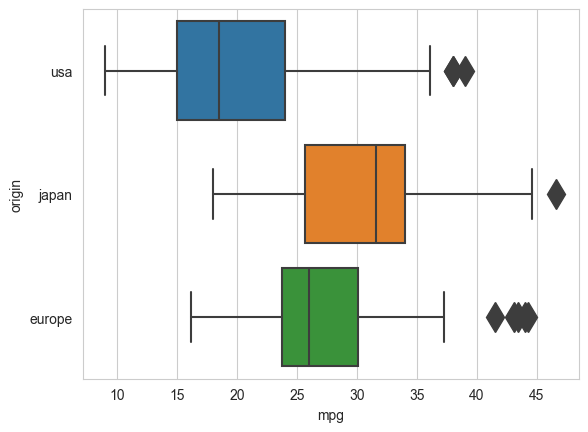

In [44]:
sns.boxplot(x=data.mpg, y=data.origin, fliersize=15); # the size of the outliers

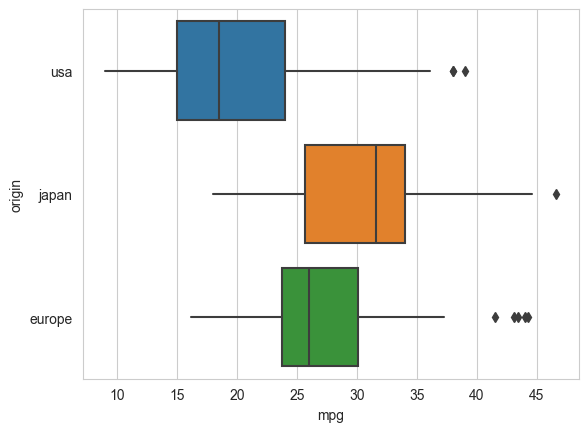

In [45]:
sns.boxplot(x=data.mpg, y=data.origin, showcaps=False); # no caps on the whiskers

# Scatter plot

We will need diamonds dataset from seaborn library. 

In [46]:
diamond = sns.load_dataset("diamonds")
diamond.shape

(53940, 10)

In [47]:
diamond.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [48]:
df = diamond.sample(n=100, random_state=20)
df.shape

(100, 10)

In [49]:
sns.set_style("dark")

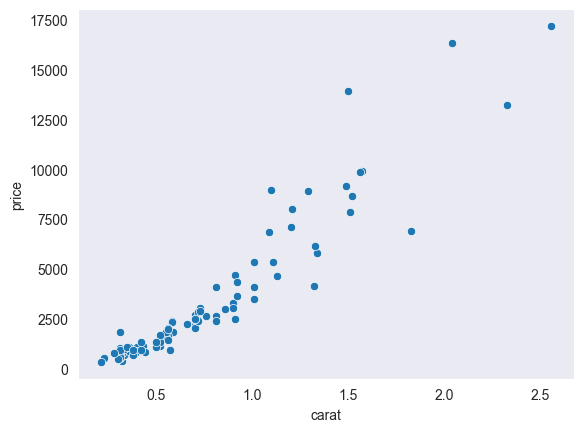

In [50]:
sns.scatterplot(x="carat", y="price", data=df);

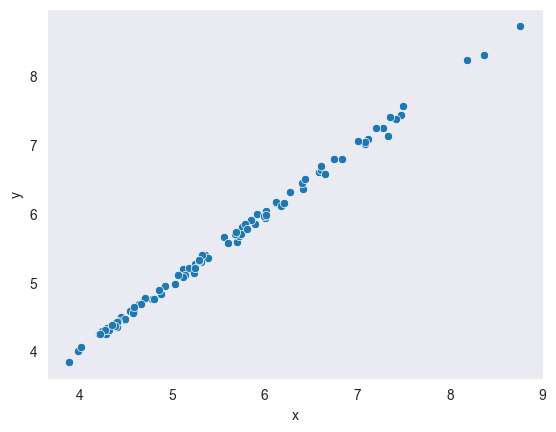

In [51]:
sns.scatterplot(x="x", y="y", data=df);

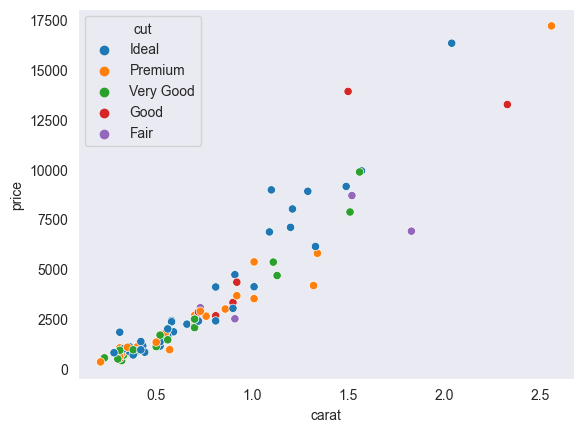

In [52]:
sns.scatterplot(x="carat", y="price", data=df, hue="cut");

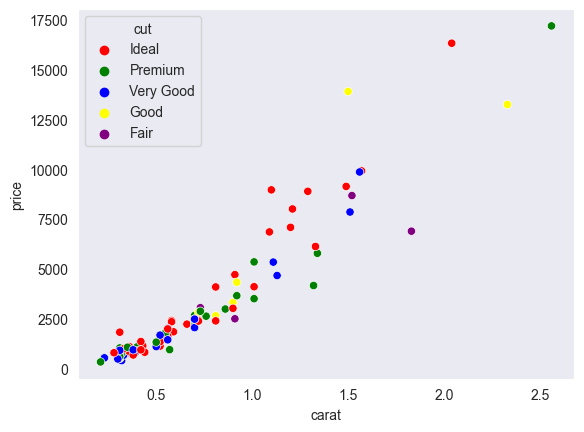

In [53]:
sns.scatterplot(x="carat", y="price", data=df, hue="cut", palette=["red", "green", "blue", "yellow", "purple"]);

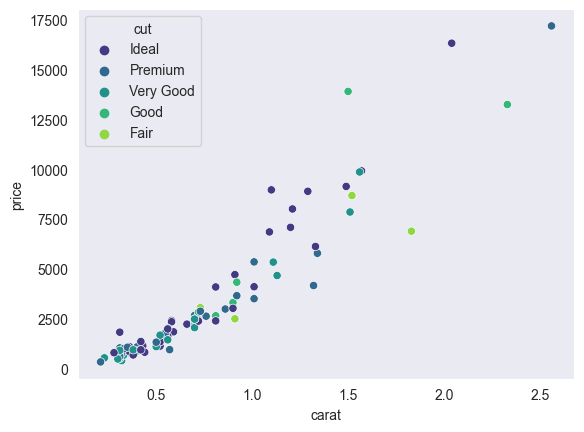

In [54]:
sns.scatterplot(x="carat", y="price", data=df, hue="cut", palette="viridis");

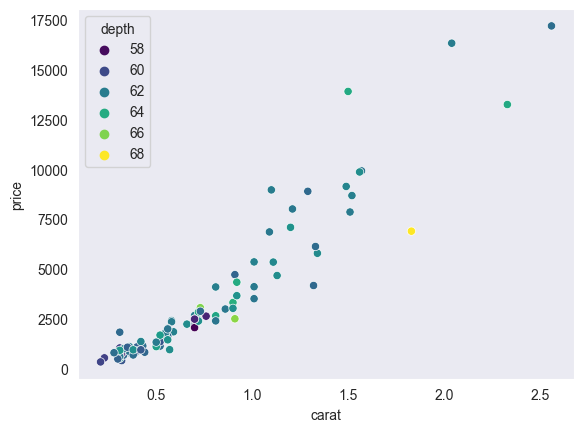

In [55]:
# hue for continuous variable
sns.scatterplot(x="carat", y="price", data=df, hue="depth", palette="viridis");

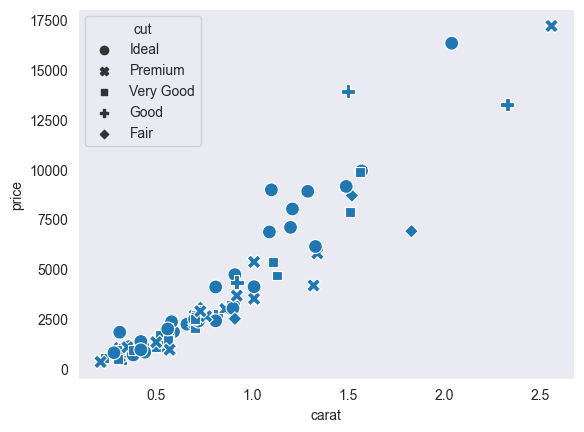

In [56]:
sns.scatterplot(x="carat", y="price", data=df, s=100, style='cut'); # size of the points

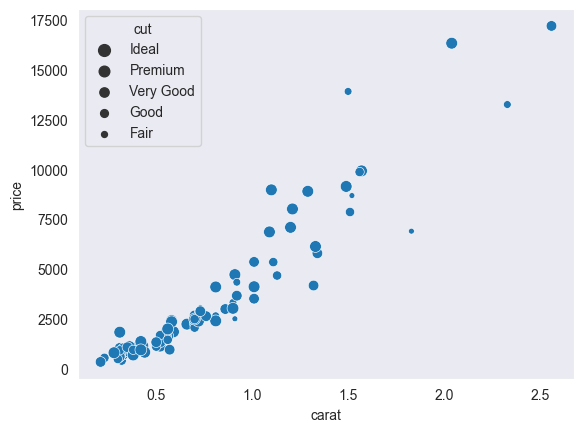

In [57]:
sns.scatterplot(x="carat", y="price", data=df, size='cut'); # we can add size of the classes by using sizes=[]

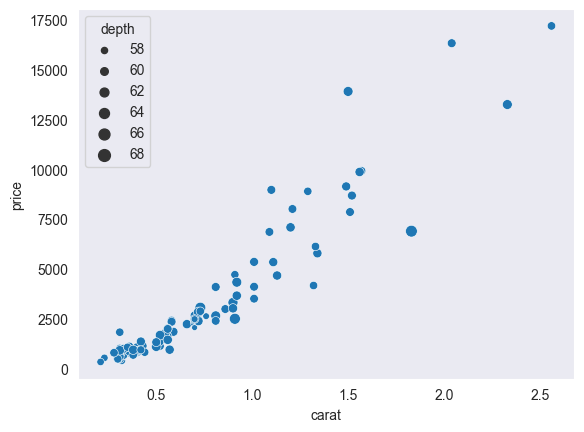

In [58]:
sns.scatterplot(x="carat", y="price", data=df, size='depth');

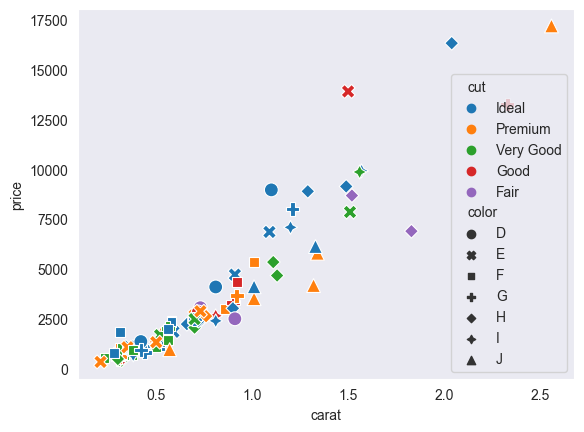

In [59]:
sns.scatterplot(x="carat", y="price", data=df, style='color', hue='cut', s=100);

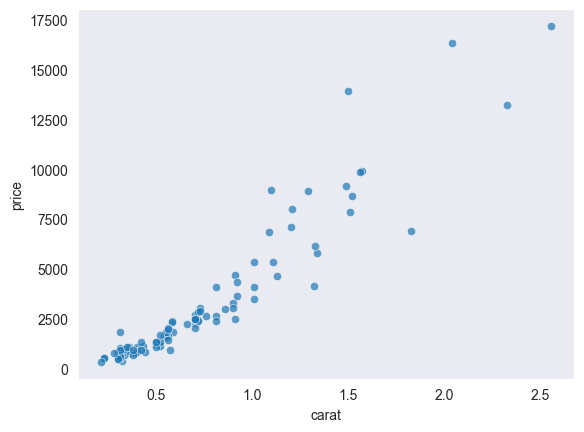

In [60]:
sns.scatterplot(x="carat", y="price", data=df, alpha=0.7);

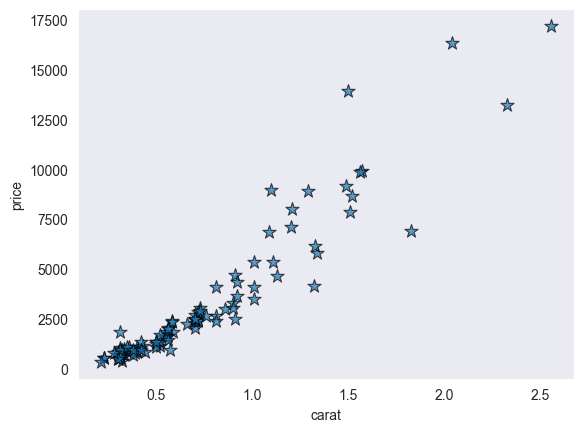

In [61]:
sns.scatterplot(x="carat", y="price", data=df, s = 100, alpha=0.7, marker='*', edgecolor='black');

# Line plot

- Grab parking data from [UCI resource](https://archive.ics.uci.edu/ml/datasets/Parking+Birmingham) with Bash commands and read in as `pandas` DataFrame.

In [62]:
parking = pd.read_csv("dataset.csv")
parking.shape

(35717, 4)

In [63]:
parking.head()

SystemCodeNumber  Capacity  Occupancy          LastUpdated
0      BHMBCCMKT01       577         61  2016-10-04 07:59:42
1      BHMBCCMKT01       577         64  2016-10-04 08:25:42
2      BHMBCCMKT01       577         80  2016-10-04 08:59:42
3      BHMBCCMKT01       577        107  2016-10-04 09:32:46
4      BHMBCCMKT01       577        150  2016-10-04 09:59:48

In [64]:
parking.rename(columns={"SystemCodeNumber": "Location", "LastUpdated": "Timestamp"}, inplace=True)
parking['Day'] = pd.to_datetime(parking['Timestamp']).dt.date
parking['Month'] = pd.to_datetime(parking['Timestamp']).dt.month
parking['Year'] = pd.to_datetime(parking['Timestamp']).dt.year
parking['Hour'] = pd.to_datetime(parking['Timestamp']).dt.hour
parking.head()

Location  Capacity  Occupancy            Timestamp         Day  Month  \
0  BHMBCCMKT01       577         61  2016-10-04 07:59:42  2016-10-04     10   
1  BHMBCCMKT01       577         64  2016-10-04 08:25:42  2016-10-04     10   
2  BHMBCCMKT01       577         80  2016-10-04 08:59:42  2016-10-04     10   
3  BHMBCCMKT01       577        107  2016-10-04 09:32:46  2016-10-04     10   
4  BHMBCCMKT01       577        150  2016-10-04 09:59:48  2016-10-04     10   

   Year  Hour  
0  2016     7  
1  2016     8  
2  2016     8  
3  2016     9  
4  2016     9

In [65]:
park = parking[parking.Location.isin(['Broad Street', 'NIA South'])]
print(park.shape)
park.head()

(2516, 8)


Location  Capacity  Occupancy            Timestamp         Day  \
20171  Broad Street       690        178  2016-10-04 07:59:42  2016-10-04   
20172  Broad Street       690        269  2016-10-04 08:25:42  2016-10-04   
20173  Broad Street       690        415  2016-10-04 08:59:42  2016-10-04   
20174  Broad Street       690        530  2016-10-04 09:32:46  2016-10-04   
20175  Broad Street       690        600  2016-10-04 09:59:48  2016-10-04   

       Month  Year  Hour  
20171     10  2016     7  
20172     10  2016     8  
20173     10  2016     8  
20174     10  2016     9  
20175     10  2016     9

In [66]:
sns.set_style("dark")

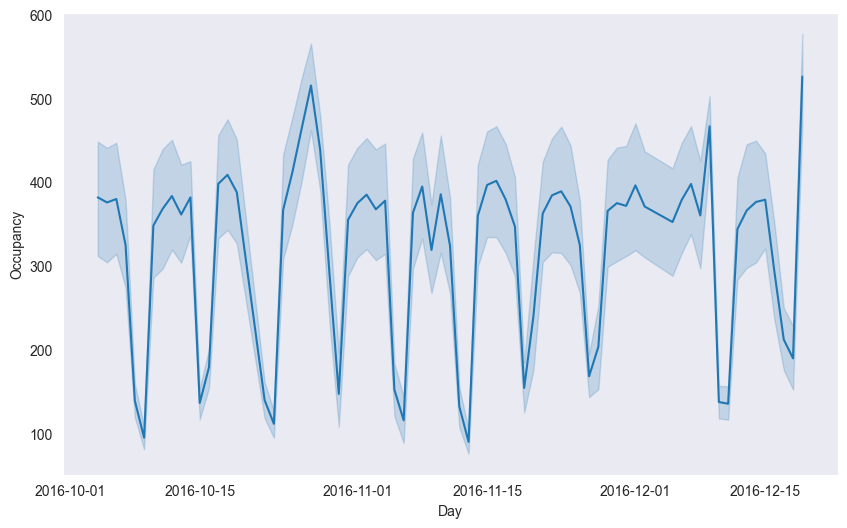

In [67]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Day", y="Occupancy", data=park);

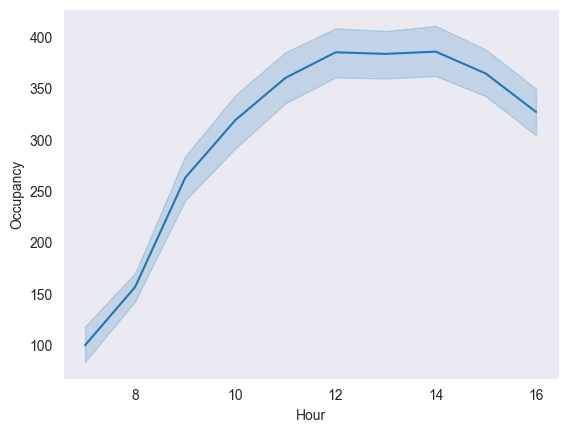

In [68]:
sns.lineplot(x="Hour", y="Occupancy", data=park);

## Confidence Interval and Bootstrapping

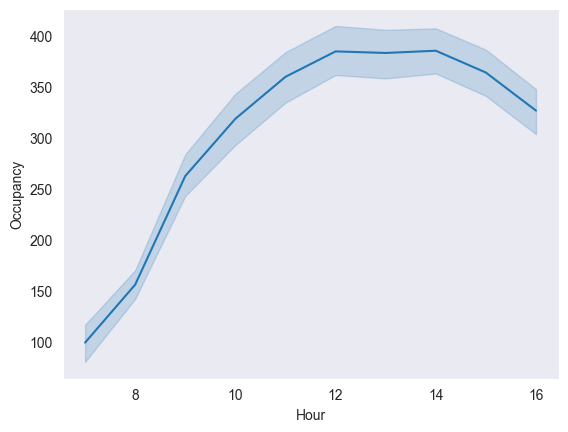

In [69]:
sns.lineplot(x="Hour", y="Occupancy", data=park, n_boot=1000); # default number of bootstraps
## the reslut will be the same every time we run the code as we have a large number of bootstraps

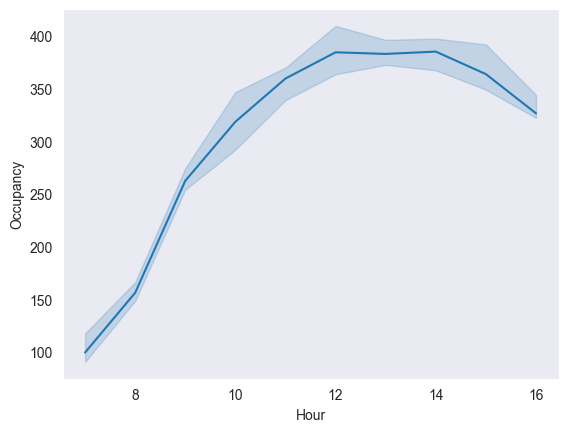

In [70]:
sns.lineplot(x="Hour", y="Occupancy", data=park, n_boot=10);
# the result will differ every time we run this as we have only 10 bootstraps

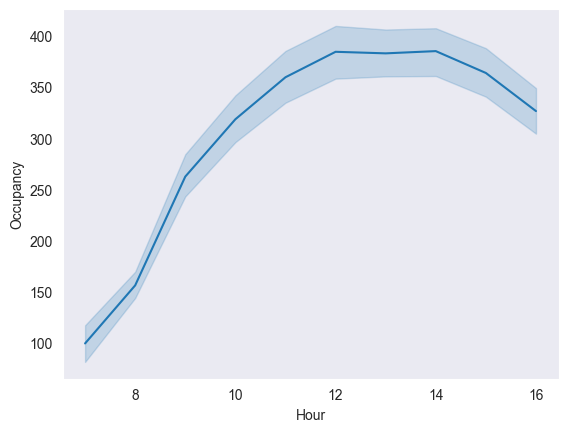

In [71]:
sns.lineplot(x="Hour", y="Occupancy", data=park, ci=95); # default confidence interval is 95%

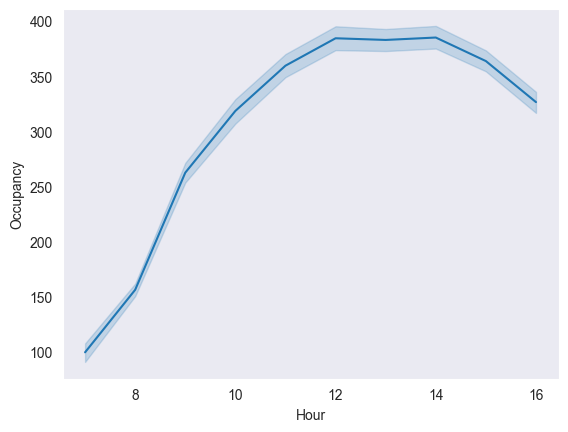

In [72]:
sns.lineplot(x="Hour", y="Occupancy", data=park, ci=60);

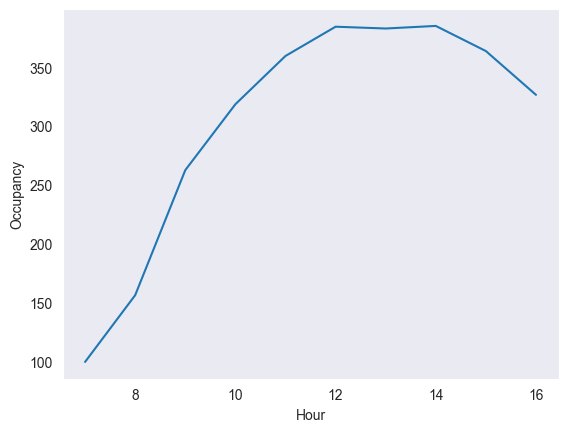

In [73]:
sns.lineplot(x="Hour", y="Occupancy", data=park, ci=None); # no confidence interval

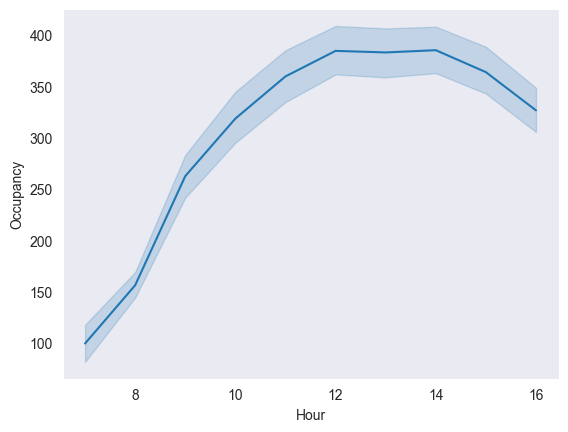

In [74]:
sns.lineplot(x="Hour", y="Occupancy", data=park, estimator="mean"); # default

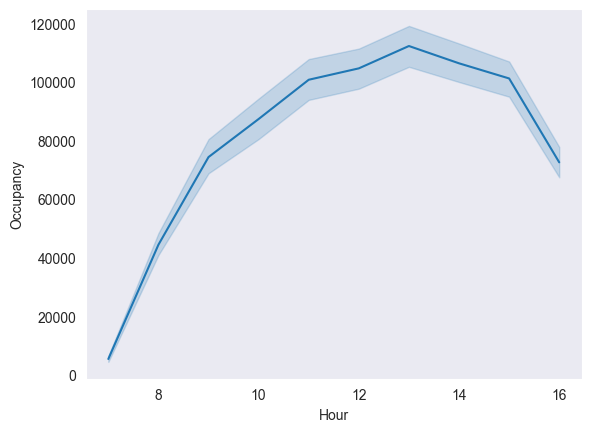

In [75]:
sns.lineplot(x="Hour", y="Occupancy", data=park, estimator="sum");

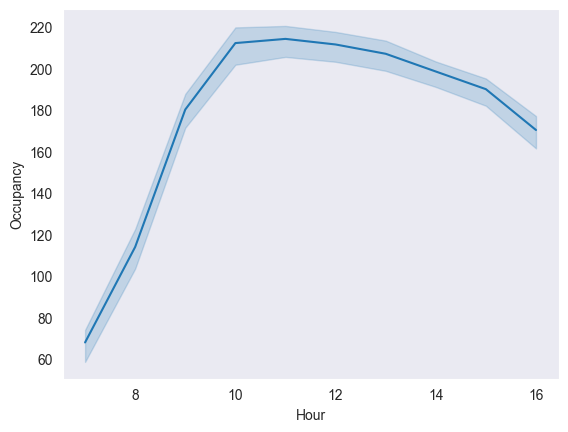

In [76]:
sns.lineplot(x="Hour", y="Occupancy", data=park, estimator="std");

## Visual semantics

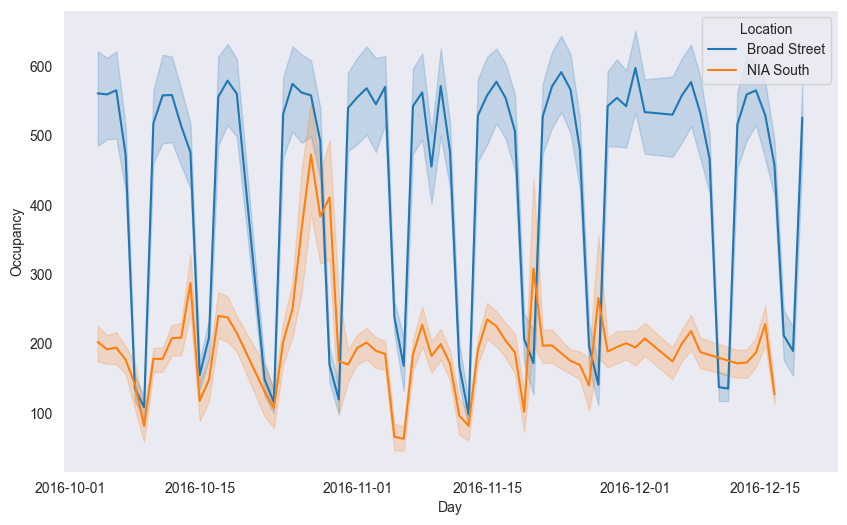

In [77]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Day", y="Occupancy", data=park, hue="Location");

- xkcd is is a popular web comic created by Randall Munroe.
- His "Color Name Survey" (with 200 000 participants) resulted in a list of nearly 1000 color names which is super cool.

You can access it [here](https://www.w3schools.com/colors/colors_xkcd.asp)

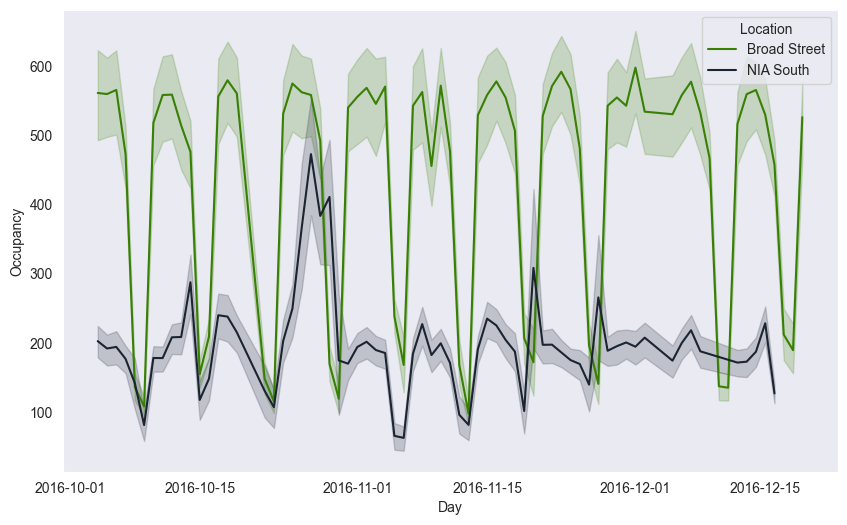

In [78]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Day", y="Occupancy", data=park, hue="Location", palette=["xkcd:dark grass green", "xkcd:dark"]);

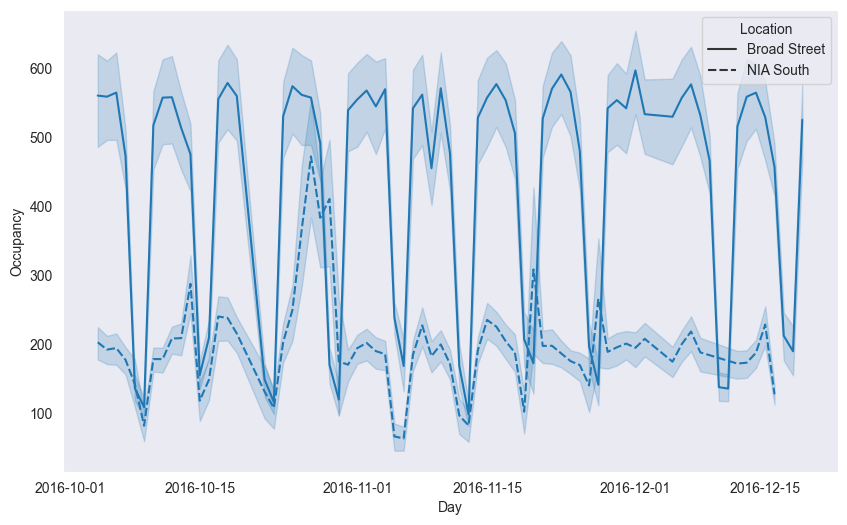

In [79]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Day", y="Occupancy", data=park, style="Location");

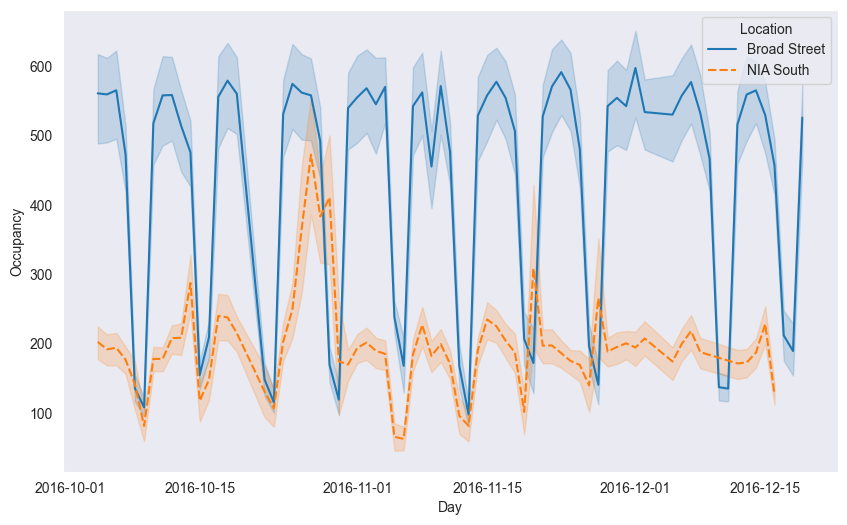

In [80]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Day", y="Occupancy", data=park, hue="Location", style="Location");

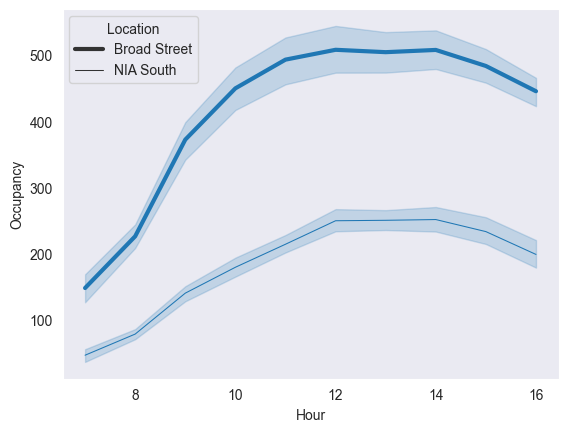

In [81]:
sns.lineplot(x="Hour", y="Occupancy", data=park, size="Location");

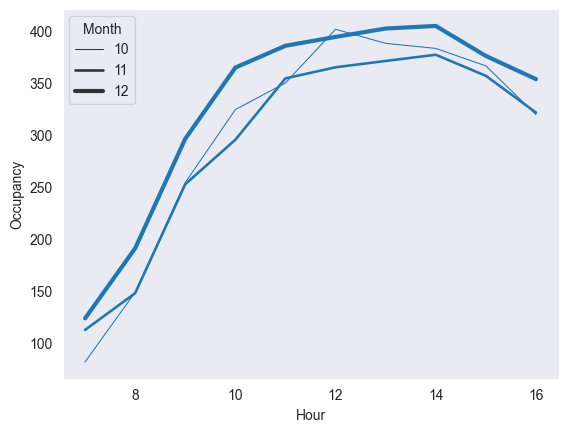

In [82]:
sns.lineplot(x="Hour", y="Occupancy", data=park, size="Month", ci=None);

### Styles inherited from Matplotlib

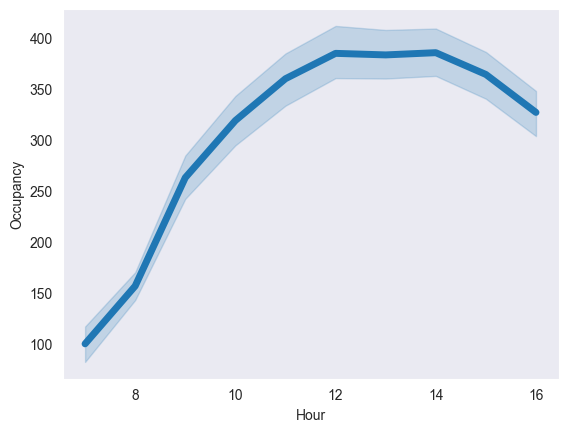

In [83]:
sns.lineplot(x="Hour", y="Occupancy", data=park, lw=5);

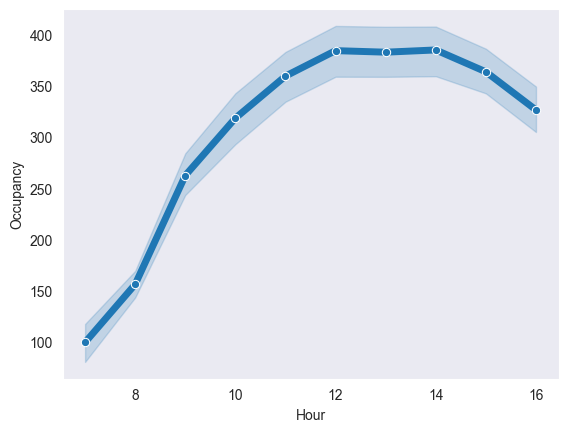

In [84]:
sns.lineplot(x="Hour", y="Occupancy", data=park, lw=5, marker='o');

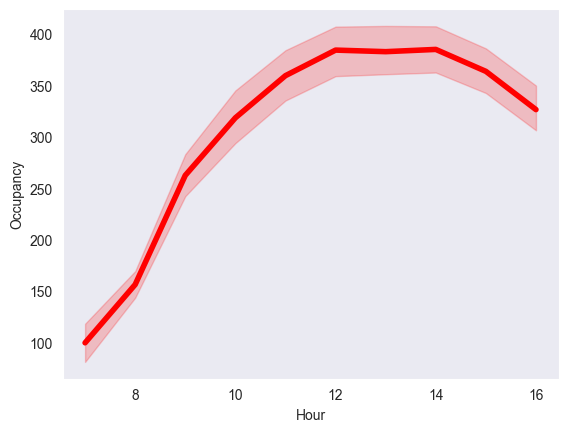

In [85]:
sns.lineplot(x="Hour", y="Occupancy", data=park, lw=4, color='red'); # you can put any other formats of colors like hex

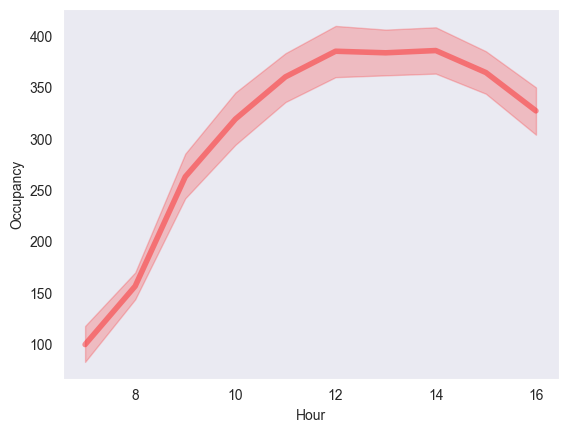

In [86]:
sns.lineplot(x="Hour", y="Occupancy", data=park, lw=4, color='red', alpha=0.4); # transparency

# Heatmap

In [87]:
# we will use mpg dataset we used earlier which labeled 'data'
cars = data
cars.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  newer_model  
0          70    usa  chevrolet chevelle malibu        False  
1          70    usa          buick skylark 320        False  
2          70    usa         plymouth satellite        False  
3          70    usa              amc rebel sst        False  
4          70    usa                ford torino        False

In [88]:
cars.groupby(cars.origin).cylinders.value_counts()

origin  cylinders
europe  4             61
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             73
        4             69
Name: cylinders, dtype: int64

In [89]:
origin_cyl = cars.groupby(cars.origin).cylinders.value_counts().unstack().fillna(0)

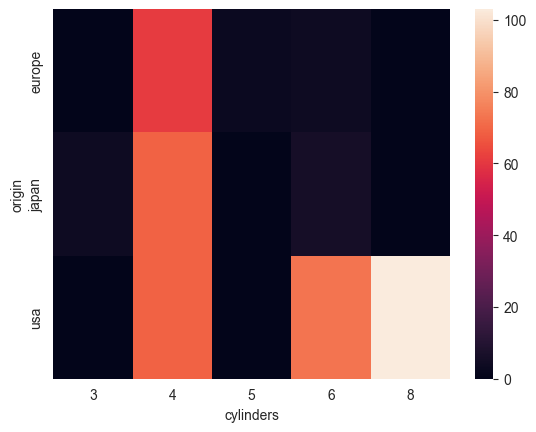

In [90]:
sns.heatmap(origin_cyl); # we can use numpy arrays as well

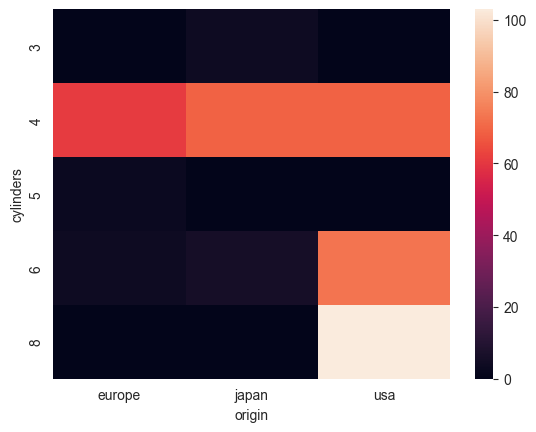

In [91]:
sns.heatmap(origin_cyl.T);

In [92]:
numerics = ['int', 'float']
cars_num = cars.select_dtypes(include=numerics)
cars_num.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model_year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              acceleration  model_year  
mpg               0.423329    0.580541  
cylinders        -0.504683   -0.345647  
displacement     -0.543800   -0.369855  
horsepower       -0.689196   -0.416361  
weight           -0.416839   -0.309120  
acceleration      1.000000    0.290316  
model_year        0.290316    1.000000

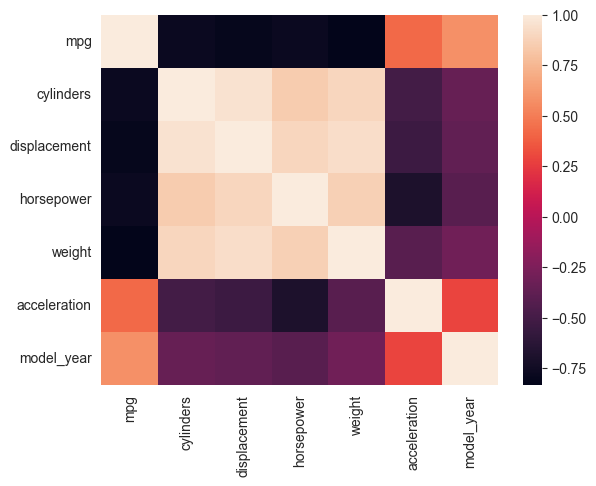

In [93]:
sns.heatmap(cars_num.corr());

## Color palette for heatmap

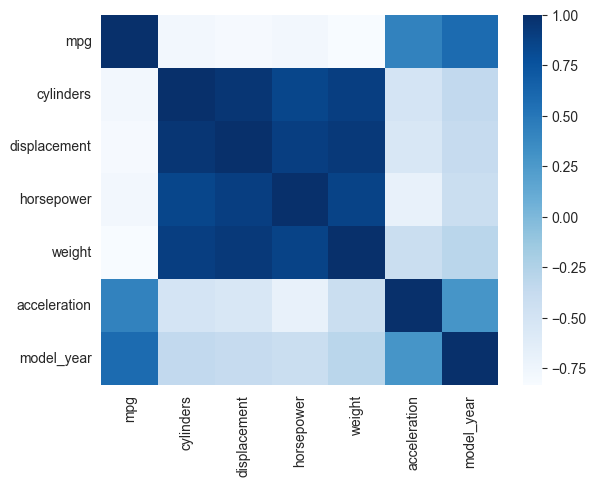

In [94]:
sns.heatmap(cars_num.corr(), cmap='Blues');

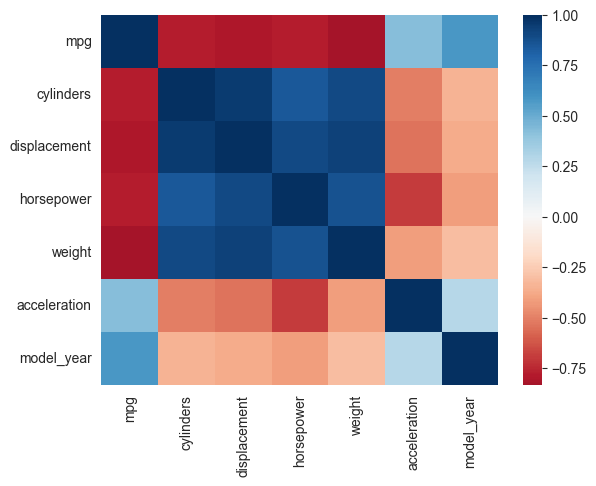

In [95]:
sns.heatmap(cars_num.corr(), cmap='RdBu', center=0); # to center the 0 on white color

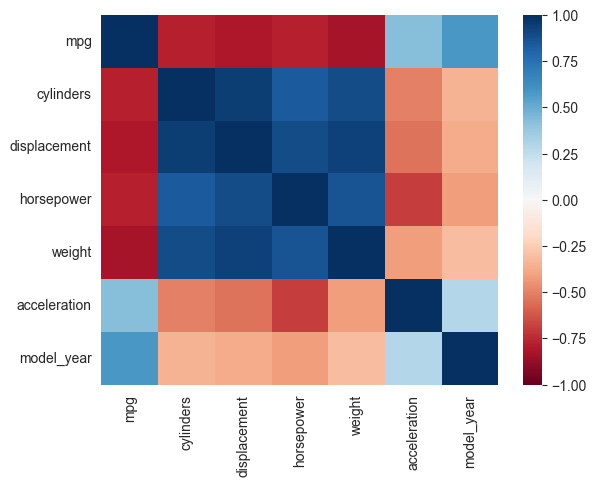

In [96]:
sns.heatmap(cars_num.corr(), cmap='RdBu', vmin=-1, vmax=1);

## Anonotations

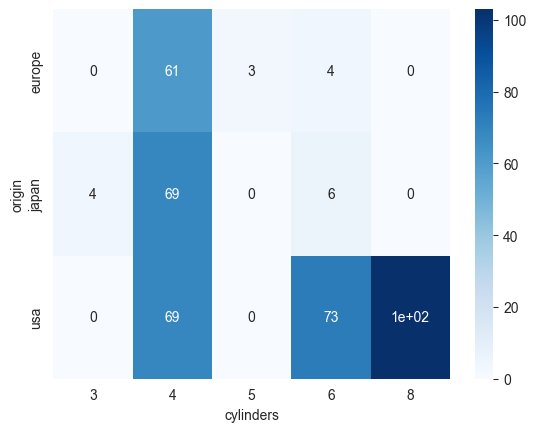

In [97]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True);

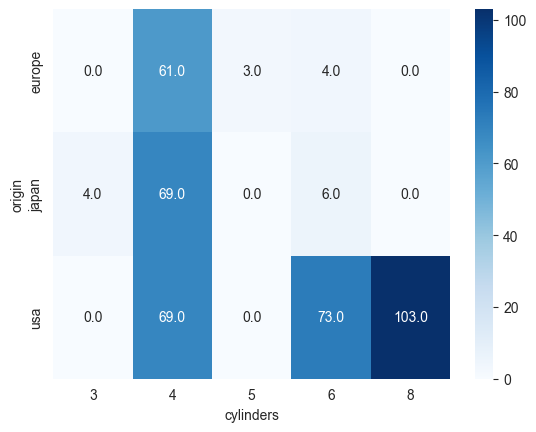

In [98]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True, fmt='0.1f'); # the format of the annot text

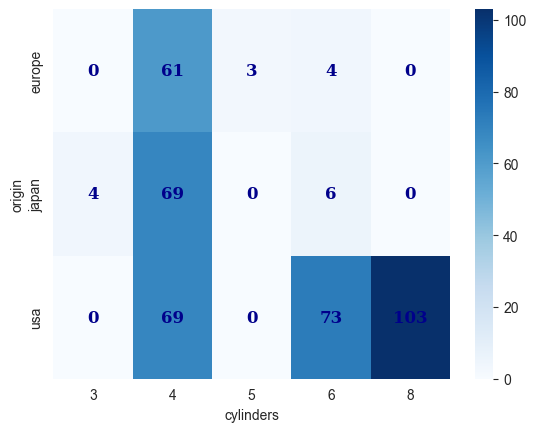

In [99]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True, fmt='.0f', 
            annot_kws={
                'fontsize' : 12,
                'fontweight' : 'bold', 
                'fontfamily' : 'serif',
                'color' : 'darkblue'
            });

We can see that we losing information in the darkest regions, so we can leave it determined automatically by seaborn library.

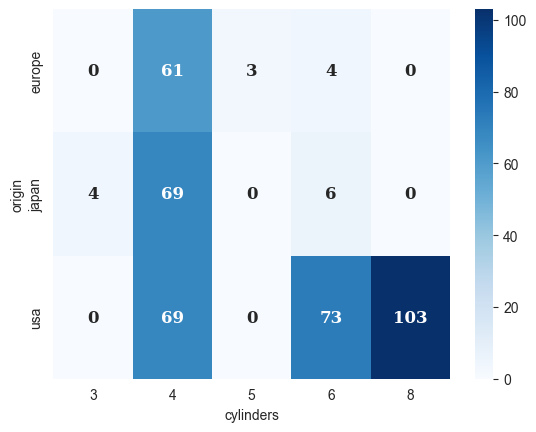

In [100]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True, fmt='.0f', 
            annot_kws={
                'fontsize' : 12,
                'fontweight' : 'bold', 
                'fontfamily' : 'serif'
            });

## Some styling

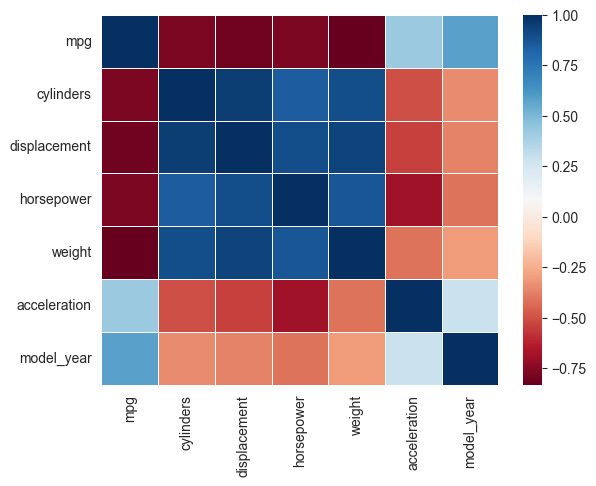

In [101]:
sns.heatmap(cars_num.corr(), cmap='RdBu', linewidths=.5);

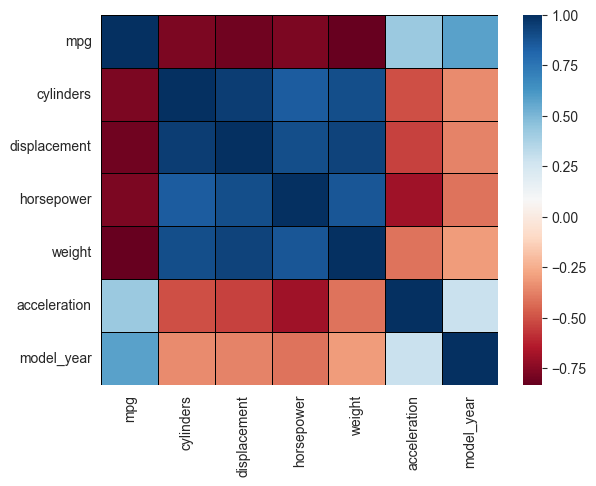

In [102]:
sns.heatmap(cars_num.corr(), cmap='RdBu', linewidths=.5, linecolor='black');

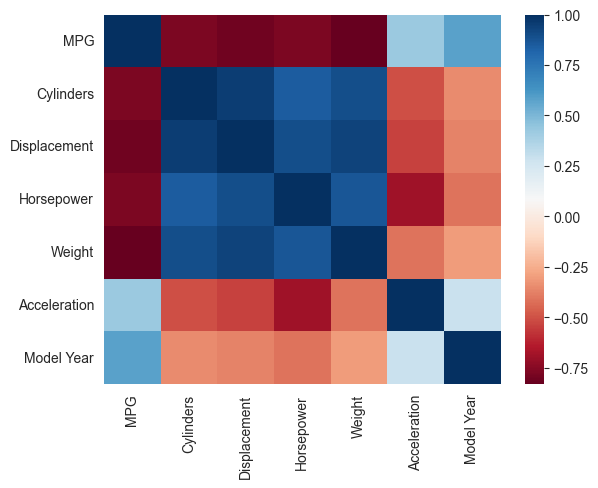

In [103]:
labels = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
          'Weight', 'Acceleration', 'Model Year']

sns.heatmap(cars_num.corr(), cmap='RdBu',
           xticklabels=labels,
            yticklabels=labels
           );

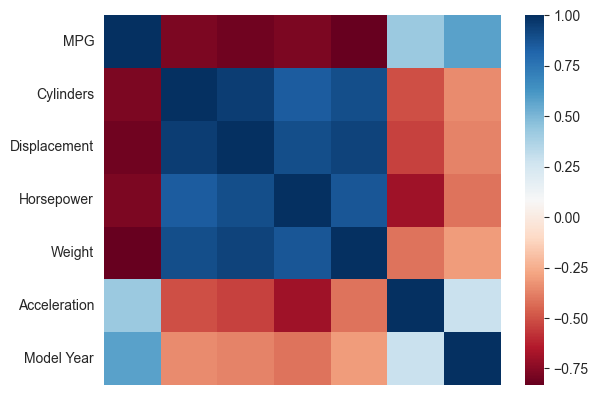

In [104]:
sns.heatmap(cars_num.corr(), cmap='RdBu',
           xticklabels=False,
            yticklabels=labels
           );

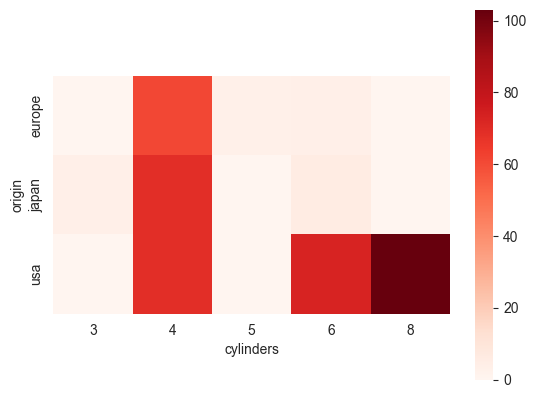

In [105]:
sns.heatmap(origin_cyl, cmap='Reds',
           square=True
           );
# now we have perfect squares no matter elements are in the heatmap

# Bar plot

- In barplots we have one categorical variable and one numeric variable. 

First we will need to grab penguins data from seaborn library.

In [106]:
penguins = sns.load_dataset('penguins')
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [107]:
penguins.shape

(344, 7)

In [108]:
sns.set_style('darkgrid')

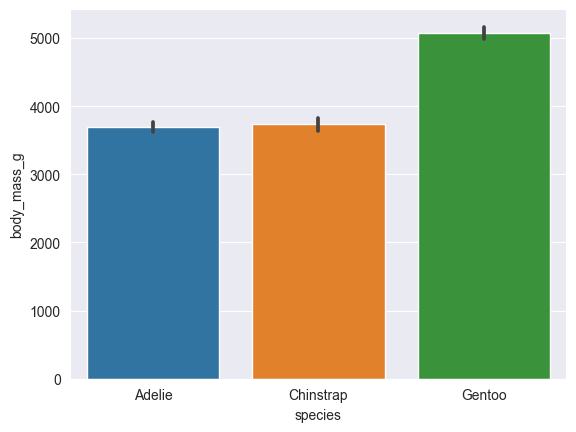

In [109]:
sns.barplot(x='species', y='body_mass_g', data=penguins);

In [110]:
penguins.groupby('species').body_mass_g.mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

So what happened in the barplot that it grouped by species column and calculated the mean and this was the result.

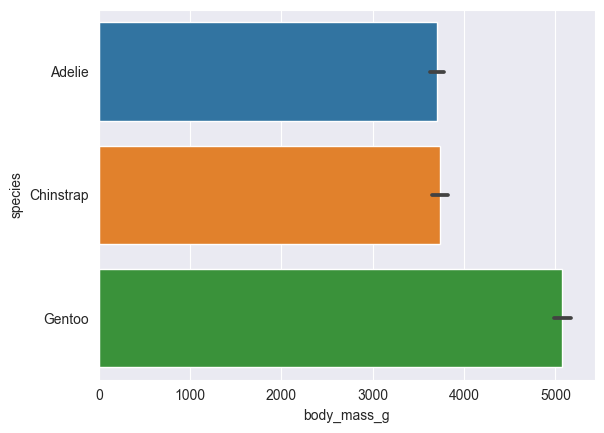

In [111]:
sns.barplot(y='species', x='body_mass_g', data=penguins); # to make it horizontally

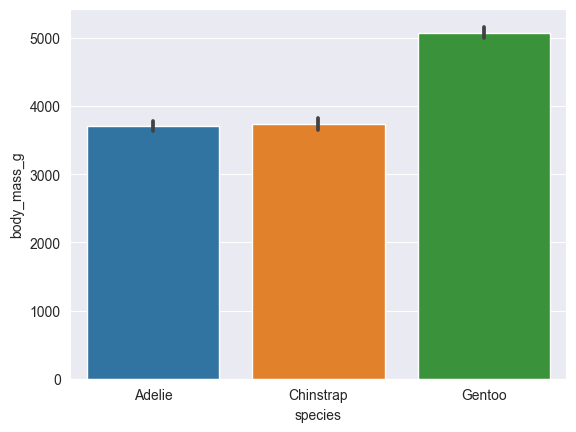

In [112]:
sns.barplot(x='species', y='body_mass_g', data=penguins, ci=95); # the default of confidence interval

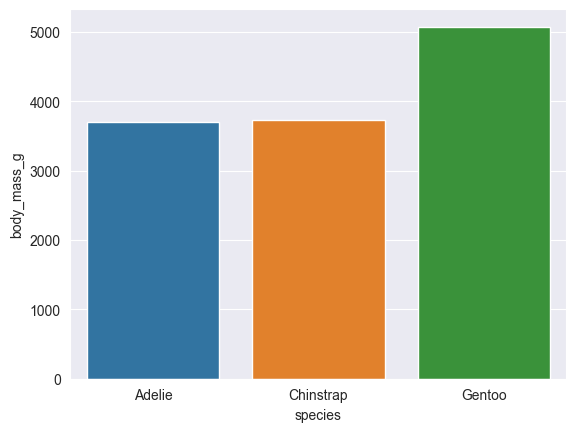

In [113]:
sns.barplot(x='species', y='body_mass_g', data=penguins, ci=None);

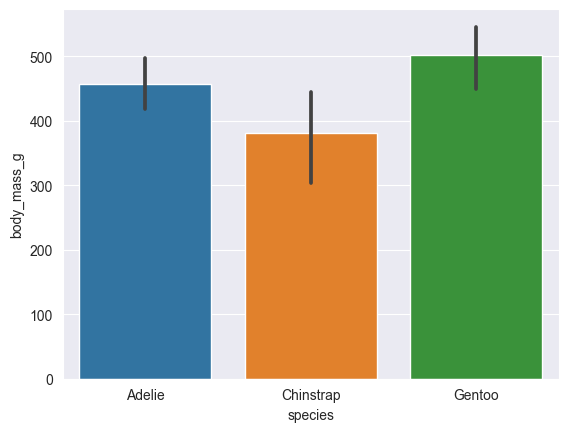

In [114]:
sns.barplot(x='species', y='body_mass_g', data=penguins,
           estimator=np.std
           );

In [115]:
penguins.groupby('species').body_mass_g.describe()

count         mean         std     min     25%     50%     75%  \
species                                                                     
Adelie     151.0  3700.662252  458.566126  2850.0  3350.0  3700.0  4000.0   
Chinstrap   68.0  3733.088235  384.335081  2700.0  3487.5  3700.0  3950.0   
Gentoo     123.0  5076.016260  504.116237  3950.0  4700.0  5000.0  5500.0   

              max  
species            
Adelie     4775.0  
Chinstrap  4800.0  
Gentoo     6300.0

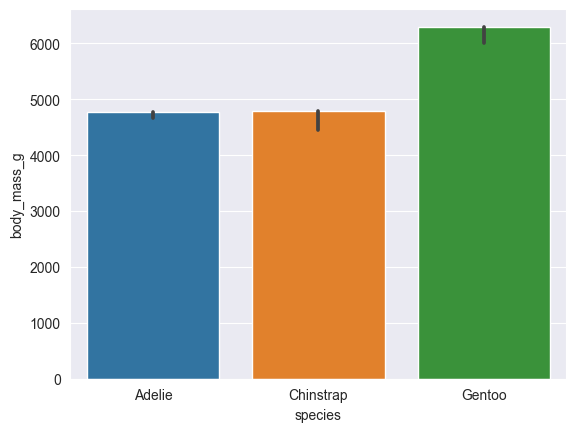

In [116]:
sns.barplot(x='species', y='body_mass_g', data=penguins,
           estimator=np.max);

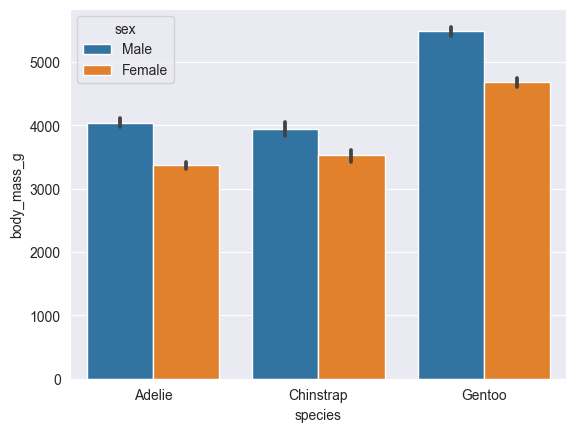

In [117]:
sns.barplot(x='species', y='body_mass_g', data=penguins, hue='sex'); # 2 categorical variables

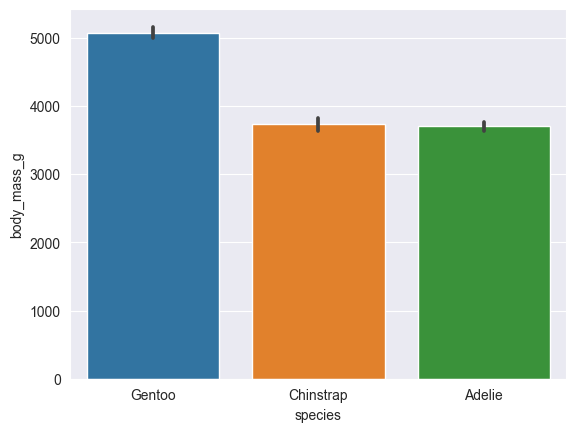

In [118]:
sns.barplot(x='species', y='body_mass_g', data=penguins,
           order=['Gentoo', 'Chinstrap', 'Adelie']
           );

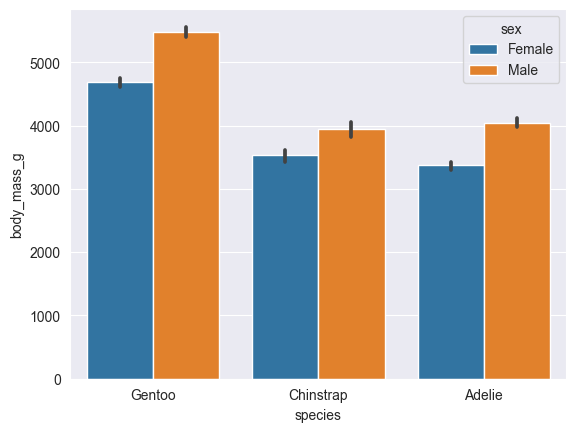

In [119]:
sns.barplot(x='species', y='body_mass_g', data=penguins,
           order=['Gentoo', 'Chinstrap', 'Adelie'],
            hue = 'sex',
            hue_order=['Female', 'Male']
           );

## Some styling

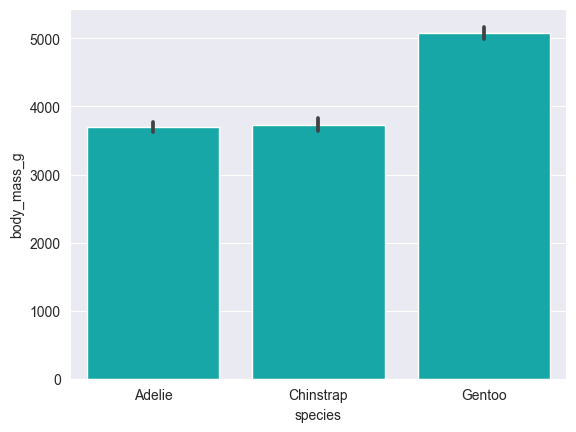

In [120]:
sns.barplot(x='species', y='body_mass_g', data=penguins, color='c');

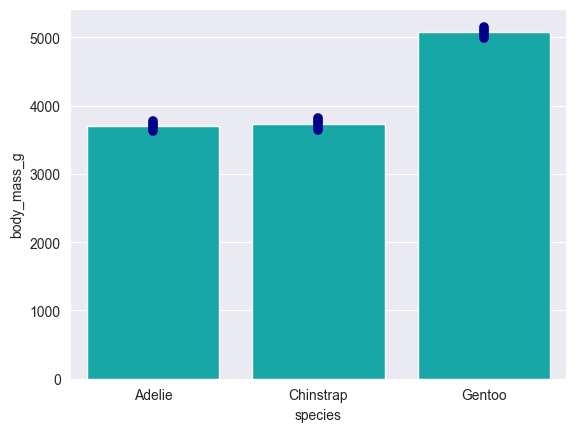

In [121]:
sns.barplot(x='species', y='body_mass_g', data=penguins, 
            color='c',
            errcolor='darkblue',
            errwidth=7
           );

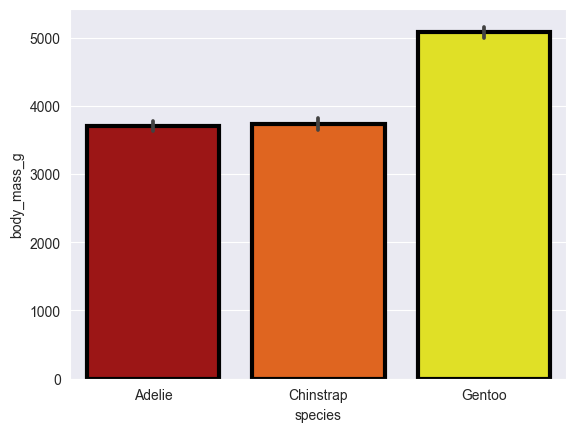

In [122]:
sns.barplot(x='species', y='body_mass_g', data=penguins, 
            palette='hot',
            edgecolor='black',
            lw=3
           );

# Count plot

We will need diamond dataset in this topic.

In [123]:
dmnd = sns.load_dataset("diamonds")
dmnd.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [124]:
dmnd = dmnd[dmnd.clarity.isin(['SI1', 'VS2'])]

In [125]:
print(dmnd.shape)
dmnd.head()

(25323, 10)


carat        cut color clarity  depth  table  price     x     y     z
1    0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3    0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
7    0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8    0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
10   0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73

In [126]:
dmnd.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [127]:
sns.set_style('darkgrid')

In [128]:
dmnd.color.value_counts()

E    4896
F    4332
G    4323
H    3918
D    3780
I    2593
J    1481
Name: color, dtype: int64

In [129]:
dmnd.color.cat.categories

Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

So it will be ordered the same as the categories:

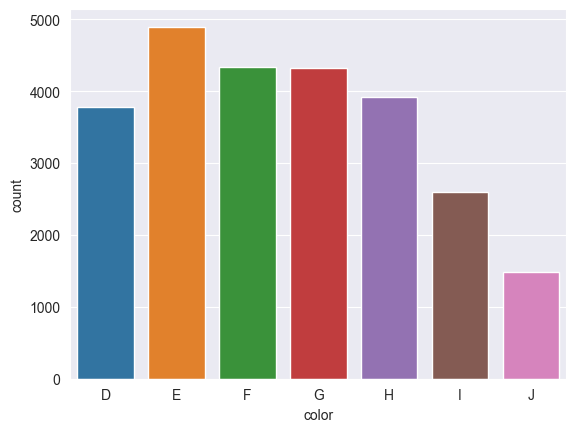

In [130]:
sns.countplot(x='color', data=dmnd);

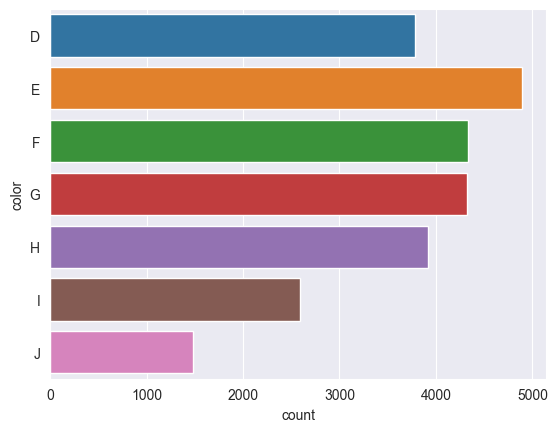

In [131]:
sns.countplot(y='color', data=dmnd);

In [132]:
dmnd.cut.cat.categories

Index(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype='object')

It will be also ordered the same as the categories:

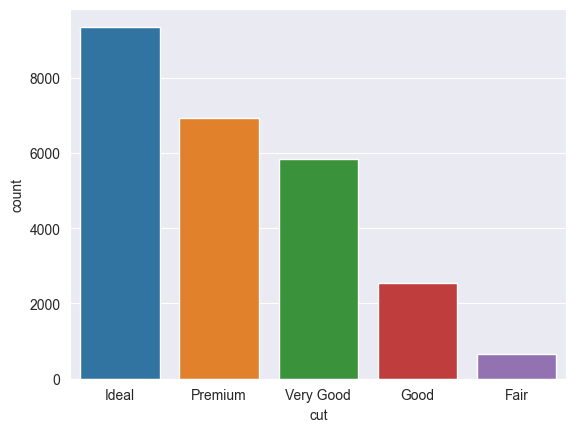

In [133]:
sns.countplot(x='cut', data=dmnd);

## Ordering

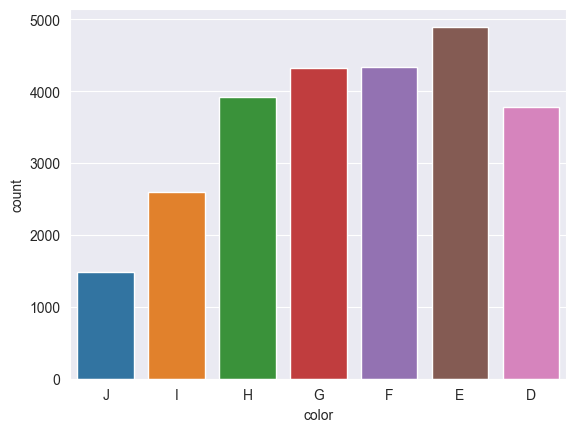

In [134]:
sns.countplot(x='color', data=dmnd,
             order=['J', 'I', 'H', 'G', 'F', 'E', 'D']
             );

And to order ascending or descending:

In [135]:
dmnd.color.value_counts()

E    4896
F    4332
G    4323
H    3918
D    3780
I    2593
J    1481
Name: color, dtype: int64

In [136]:
dmnd.color.value_counts().index

CategoricalIndex(['E', 'F', 'G', 'H', 'D', 'I', 'J'], categories=['D', 'E', 'F', 'G', 'H', 'I', 'J'], ordered=False, dtype='category')

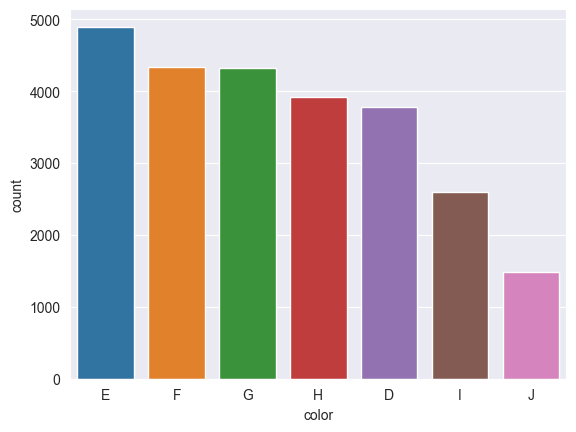

In [137]:
# descending
sns.countplot(x='color', data=dmnd, 
             order=dmnd.color.value_counts().index
             );

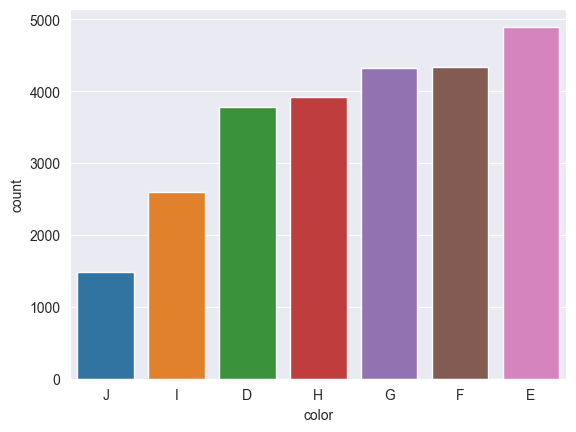

In [138]:
# ascending
sns.countplot(x='color', data=dmnd, 
             order=dmnd.color.value_counts().index[::-1]
             );

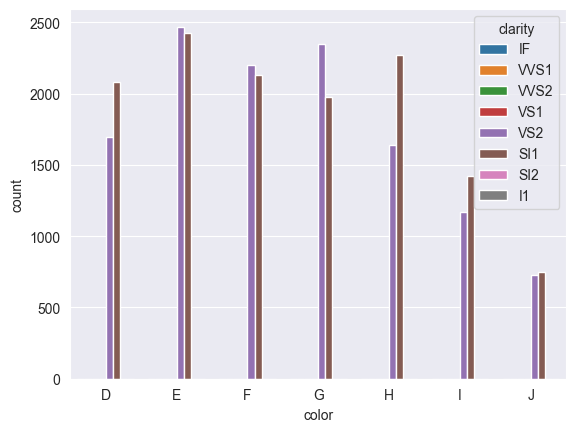

In [139]:
sns.countplot(x='color', data=dmnd, hue='clarity');

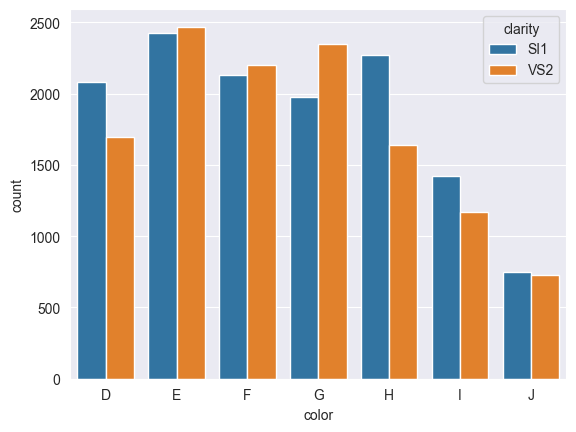

In [140]:
# to fix this we can do:
sns.countplot(x='color', data=dmnd, hue='clarity', hue_order=['SI1', 'VS2']);

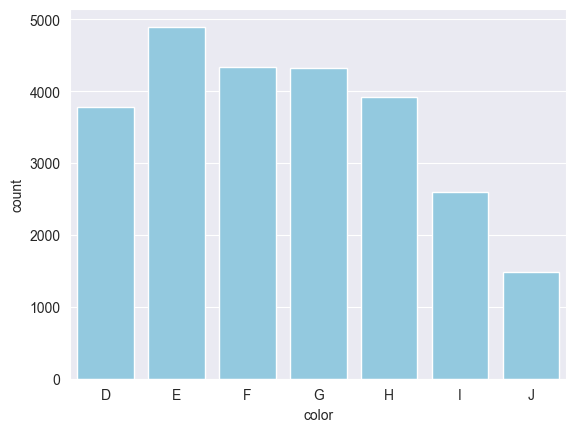

In [141]:
sns.countplot(x='color', data=dmnd, color='skyblue');

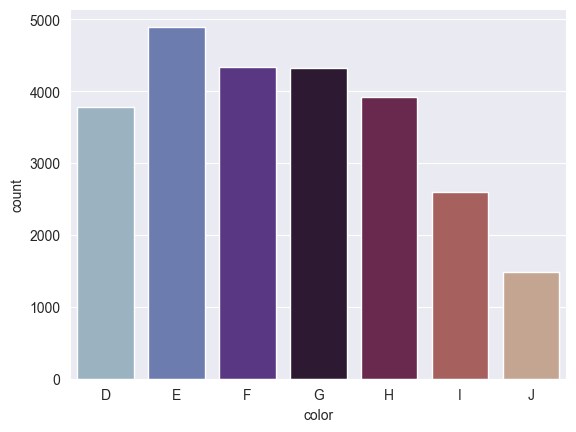

In [142]:
sns.countplot(x='color', data=dmnd, palette='twilight');

All styling things we did previously with barplots, we can do it here as well.

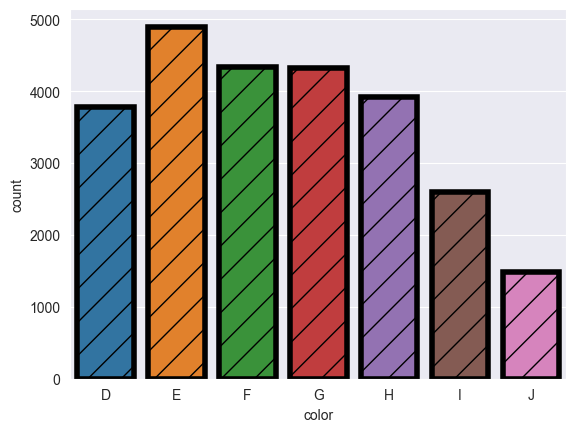

In [143]:
sns.countplot(x='color', data=dmnd, 
              edgecolor='black', lw=4, hatch='/'
             );

# Color palette

This is the section where your creativity works.

In [144]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [145]:
sns.set_style('whitegrid')

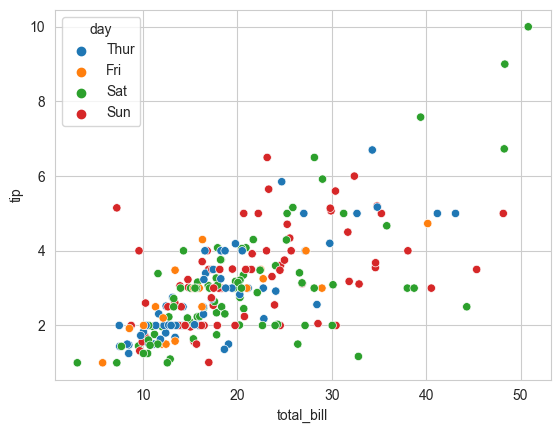

In [146]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='day');

In [147]:
sns.color_palette() # the default color palette of seaborn

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [148]:
sns.color_palette('terrain')

[(0.011764705882352955, 0.5764705882352941, 0.9764705882352941),
 (0.1450980392156863, 0.8290196078431373, 0.42901960784313725),
 (0.7098039215686275, 0.9419607843137255, 0.5419607843137255),
 (0.8549019607843137, 0.8142745098039216, 0.5216470588235294),
 (0.5725490196078431, 0.45286274509803925, 0.36917647058823533),
 (0.7176470588235294, 0.6385882352941177, 0.6216470588235294)]

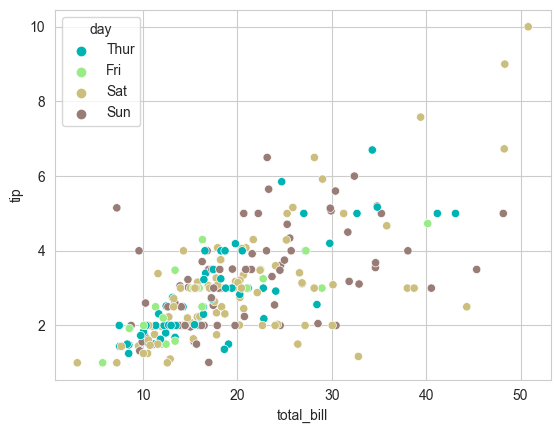

In [149]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='day', palette='terrain');

There are 170 color palettes in seaborn library and you can see them all in this [post](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f).

In [150]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='day', palette='k'); #error expected

ValueError: 'k' is not a valid palette name

Now you can see all available palettes in the error message.
- Palettes ending in "_r" are the same palette but in reversed order.


In [151]:
sns.color_palette('terrain_r')

[(0.7176470588235294, 0.6385882352941177, 0.6216470588235294),
 (0.5725490196078431, 0.4528627450980392, 0.36917647058823533),
 (0.8549019607843138, 0.8142745098039216, 0.5216470588235294),
 (0.7098039215686274, 0.9419607843137255, 0.5419607843137255),
 (0.14509803921568631, 0.8290196078431373, 0.4290196078431373),
 (0.011764705882352941, 0.5764705882352941, 0.9764705882352941)]

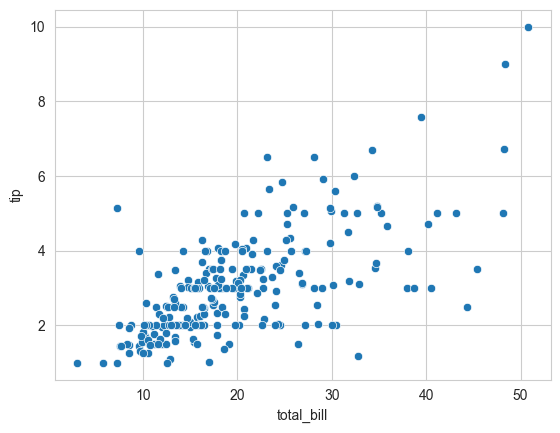

In [152]:
sns.scatterplot(x='total_bill', y='tip', data=tips);

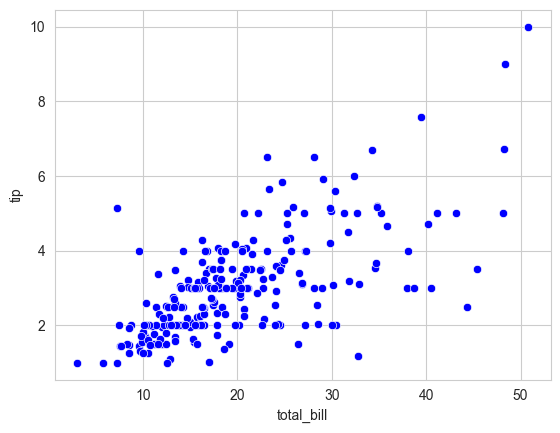

In [153]:
sns.scatterplot(x='total_bill', y='tip', data=tips, color='blue');
# It's matplotlib blue

In [154]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [155]:
blue, orange = sns.color_palette()[:2]

In [156]:
blue

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

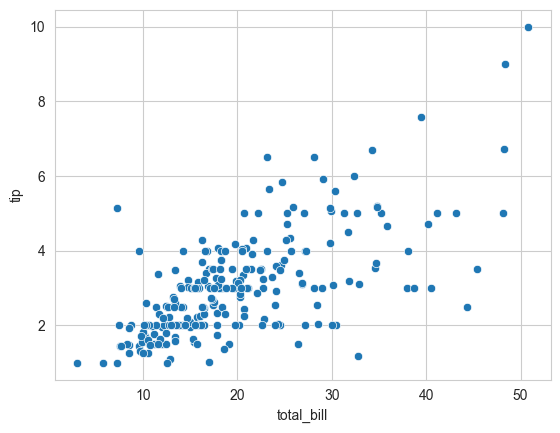

In [157]:
sns.scatterplot(x='total_bill', y='tip', data=tips, color=blue);
# now we have seaborn blue

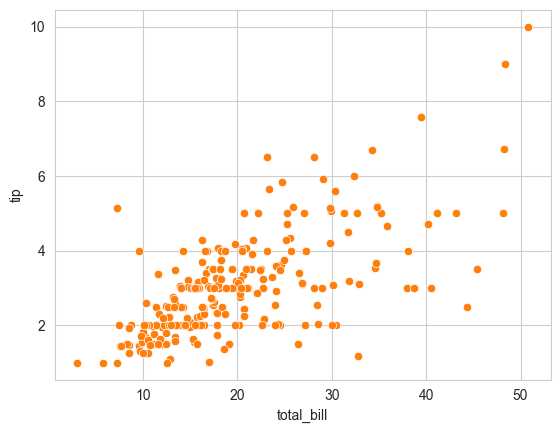

In [158]:
sns.scatterplot(x='total_bill', y='tip', data=tips, color=orange);

## Custom palettes

In [159]:
sns.color_palette('terrain', 10)

[(0.07973856209150328, 0.44052287581699345, 0.8405228758169935),
 (0.0, 0.6607843137254902, 0.8176470588235294),
 (0.08235294117647059, 0.8164705882352942, 0.41647058823529415),
 (0.4588235294117647, 0.891764705882353, 0.49176470588235294),
 (0.8196078431372549, 0.9639215686274509, 0.563921568627451),
 (0.9098039215686274, 0.8845490196078432, 0.5512941176470588),
 (0.7294117647058824, 0.6536470588235295, 0.4538823529411765),
 (0.5411764705882354, 0.41270588235294114, 0.3522352941176471),
 (0.6392156862745098, 0.5381960784313725, 0.5165490196078432),
 (0.8196078431372549, 0.7690980392156863, 0.7582745098039215)]

In [160]:
sns.color_palette('terrain', 4)

[(0.0, 0.7, 0.7),
 (0.6, 0.92, 0.52),
 (0.8, 0.744, 0.492),
 (0.6, 0.488, 0.46399999999999997)]

In [161]:
sns.light_palette('blue')

[(0.9427942677547513, 0.942825384792593, 0.9519953287278279),
 (0.754235414203801, 0.7542603078340744, 0.9615962629822623),
 (0.5656765606528508, 0.5656952308755558, 0.9711971972366967),
 (0.3771177071019005, 0.3771301539170372, 0.9807981314911312),
 (0.18855885355095026, 0.18856507695851854, 0.9903990657455656),
 (0.0, 0.0, 1.0)]

In [162]:
sns.dark_palette('blue')

[(0.14289171628325356, 0.14289583210240445, 0.19919851992384108),
 (0.11431337302660285, 0.11431666568192356, 0.3593588159390729),
 (0.08573502976995213, 0.08573749926144267, 0.5195191119543047),
 (0.05715668651330143, 0.05715833284096178, 0.6796794079695364),
 (0.028578343256650707, 0.02857916642048089, 0.8398397039847683),
 (0.0, 0.0, 1.0)]

In [163]:
sns.blend_palette(['blue', 'red'])

[(0.0, 0.0, 1.0),
 (0.2, 0.0, 0.8),
 (0.4, 0.0, 0.6),
 (0.6, 0.0, 0.4),
 (0.8, 0.0, 0.19999999999999996),
 (1.0, 0.0, 0.0)]

In [164]:
sns.blend_palette(['blue', 'red', 'yellow'], 10)

[(0.0, 0.0, 1.0),
 (0.2196078431372549, 0.0, 0.7803921568627451),
 (0.4392156862745098, 0.0, 0.5607843137254902),
 (0.6666666666666666, 0.0, 0.33333333333333337),
 (0.8862745098039215, 0.0, 0.11372549019607847),
 (1.0, 0.11372549019607843, 0.0),
 (1.0, 0.3333333333333333, 0.0),
 (1.0, 0.5607843137254902, 0.0),
 (1.0, 0.7803921568627451, 0.0),
 (1.0, 1.0, 0.0)]

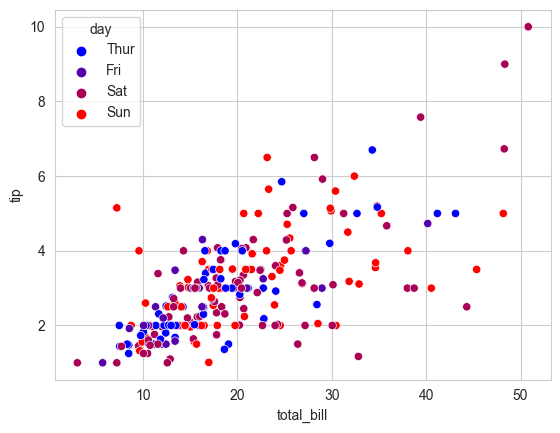

In [165]:
sns.scatterplot(x='total_bill', 
                y='tip', 
                data=tips, 
                hue='day',
                palette=sns.blend_palette(['blue', 'red'], 4)
               );
# you must specify number of colors in the palette with regard for the categoris in your data
# otherwise you will get an error

In [166]:
palette_dict = {x: 'gray' for x in tips.day.unique()}

In [167]:
palette_dict

{'Sun': 'gray', 'Sat': 'gray', 'Thur': 'gray', 'Fri': 'gray'}

In [168]:
palette_dict['Sat'] = 'crimson'

In [169]:
palette_dict

{'Sun': 'gray', 'Sat': 'crimson', 'Thur': 'gray', 'Fri': 'gray'}

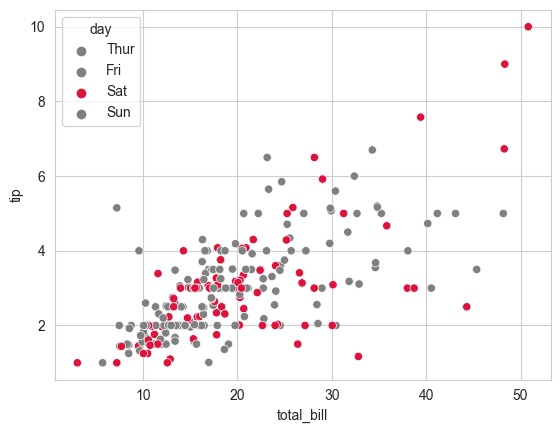

In [170]:
sns.scatterplot(x='total_bill', y='tip', data=tips, 
                hue='day', 
                palette=palette_dict
               );

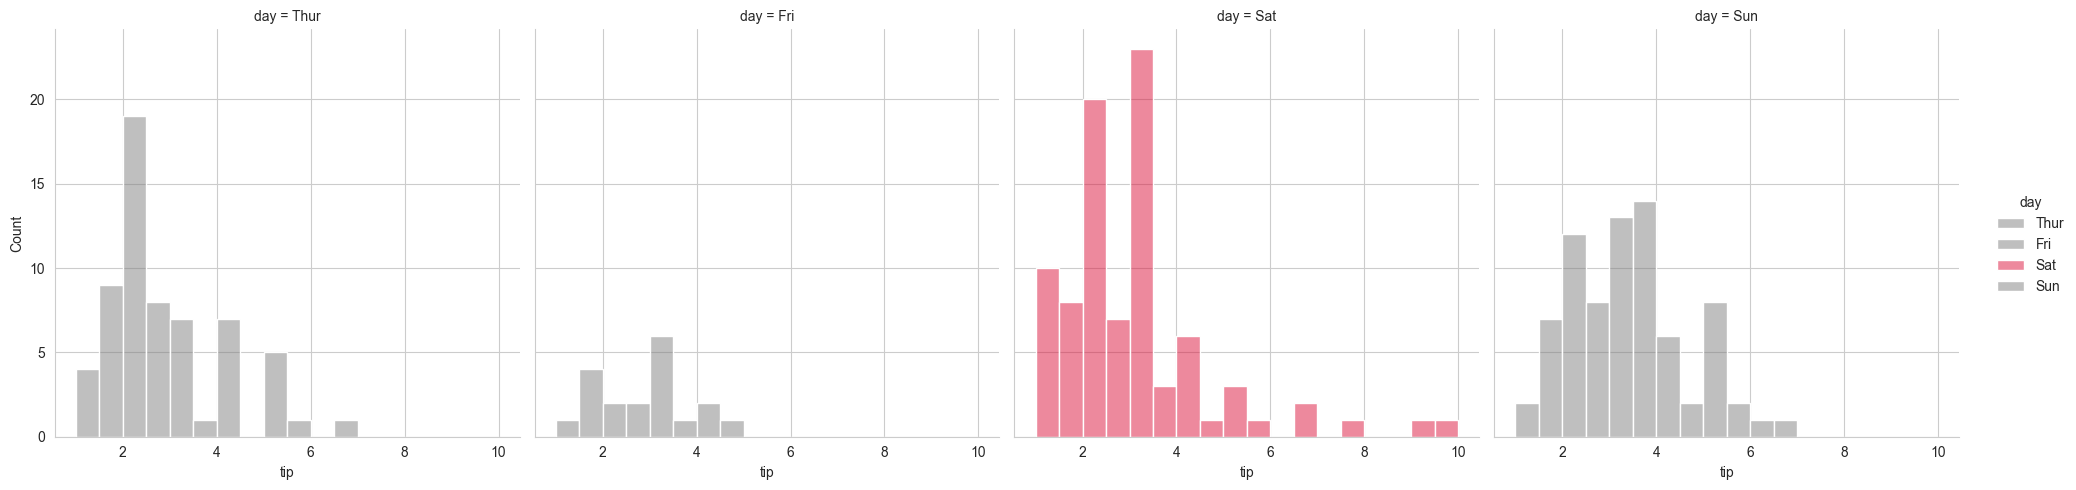

In [171]:
sns.displot(x='tip', data=tips, 
            hue='day', 
            col='day', 
            palette=palette_dict
           );

**Here we get to the end of the notebook, if you reached here congratulations; you have a useful library in your toolkit .**

This isn't everything in this fascinating library but I covered most of the popular topics.

**<div align="center">Thank you, and don't forget an upvote if you find it useful.</div>**